## Install imports and libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.decomposition import PCA


## Import, view and classify data

In [2]:
df = pd.read_csv("./heart_disease_uci.csv")
print("Shape:", df.shape)
display(df.head())
print("\nData types and non-null counts:")
display(df.info())

Shape: (920, 16)


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0



Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


None

Dataset Shape: (920, 16)

Data Types and Non-null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  target    920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB

First 5 Rows:


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0



Numeric columns: ['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
Categorical columns: ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

=== Numeric Summary ===


,count,mean,std,min,1%,5%,50%,95%,99%,max,missing,unique
id,920.0,460.500000,265.725422,1.0,10.190,46.95,460.5,874.05,910.81,920.0,0,920
age,920.0,53.510870,9.424685,28.0,32.000,37.00,54.0,68.00,74.00,77.0,0,50
trestbps,861.0,132.132404,19.066070,0.0,95.000,105.00,130.0,160.00,180.00,200.0,59,61
chol,890.0,199.130337,110.780810,0.0,0.000,0.00,223.0,334.10,412.55,603.0,30,217
thalch,865.0,137.545665,25.926276,60.0,75.560,95.00,140.0,178.00,186.36,202.0,55,119
oldpeak,858.0,0.878788,1.091226,-2.6,-0.586,0.00,0.5,3.00,4.00,6.2,62,53
ca,309.0,0.676375,0.935653,0.0,0.000,0.00,0.0,3.00,3.00,3.0,611,4



===== STATISTICS FOR id =====
count    920.000000
mean     460.500000
std      265.725422
min        1.000000
1%        10.190000
5%        46.950000
50%      460.500000
95%      874.050000
99%      910.810000
max      920.000000
Name: id, dtype: float64
Missing: 0
Unique: 920


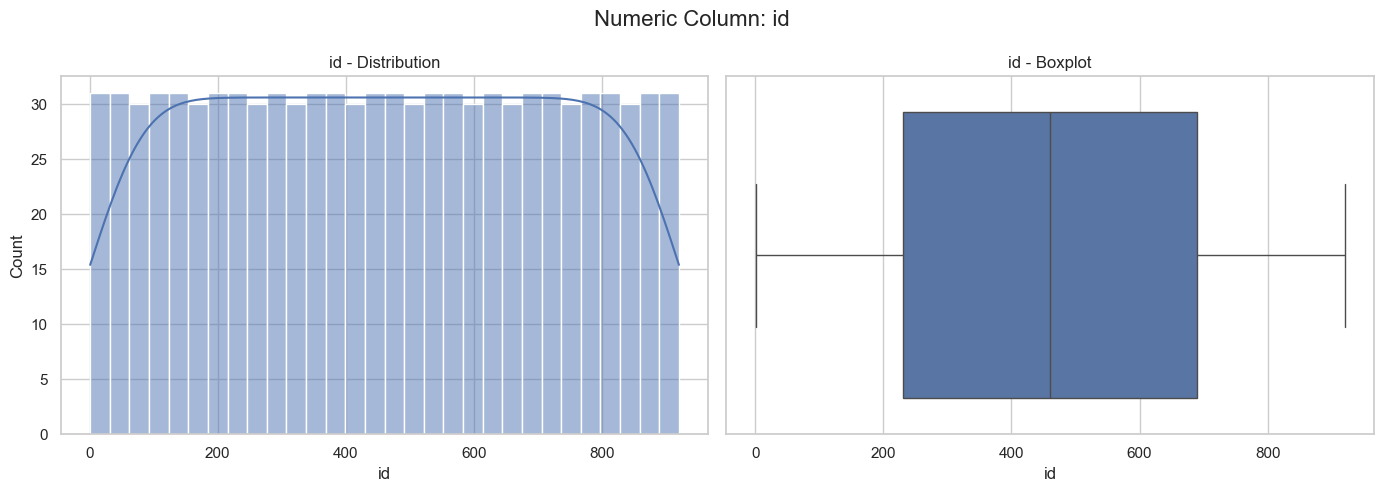


===== STATISTICS FOR age =====
count    920.000000
mean      53.510870
std        9.424685
min       28.000000
1%        32.000000
5%        37.000000
50%       54.000000
95%       68.000000
99%       74.000000
max       77.000000
Name: age, dtype: float64
Missing: 0
Unique: 50


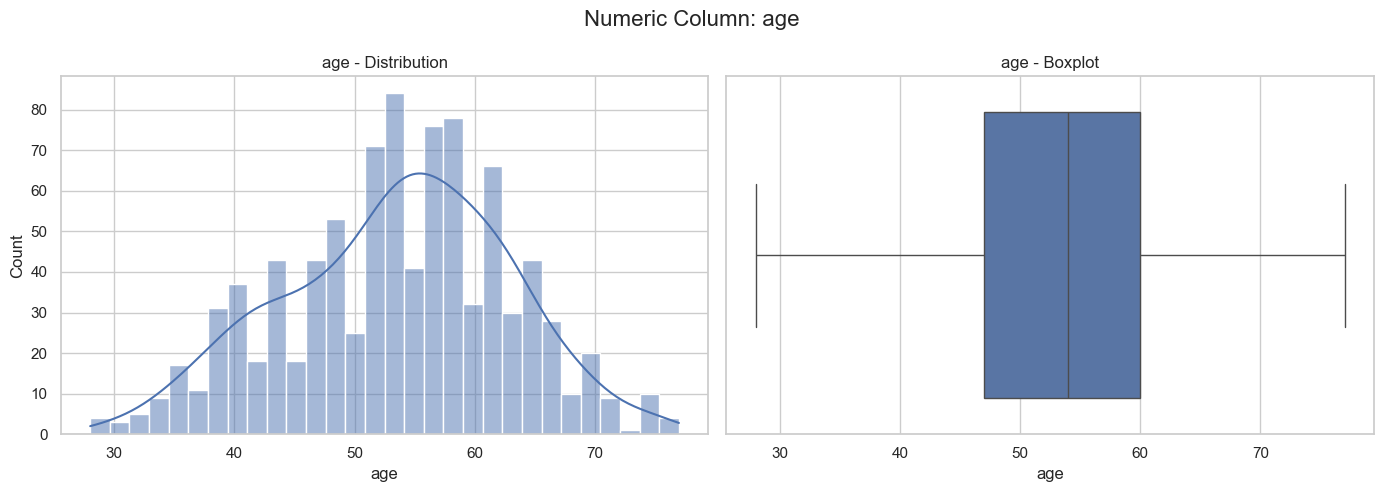


===== STATISTICS FOR trestbps =====
count    861.000000
mean     132.132404
std       19.066070
min        0.000000
1%        95.000000
5%       105.000000
50%      130.000000
95%      160.000000
99%      180.000000
max      200.000000
Name: trestbps, dtype: float64
Missing: 59
Unique: 61


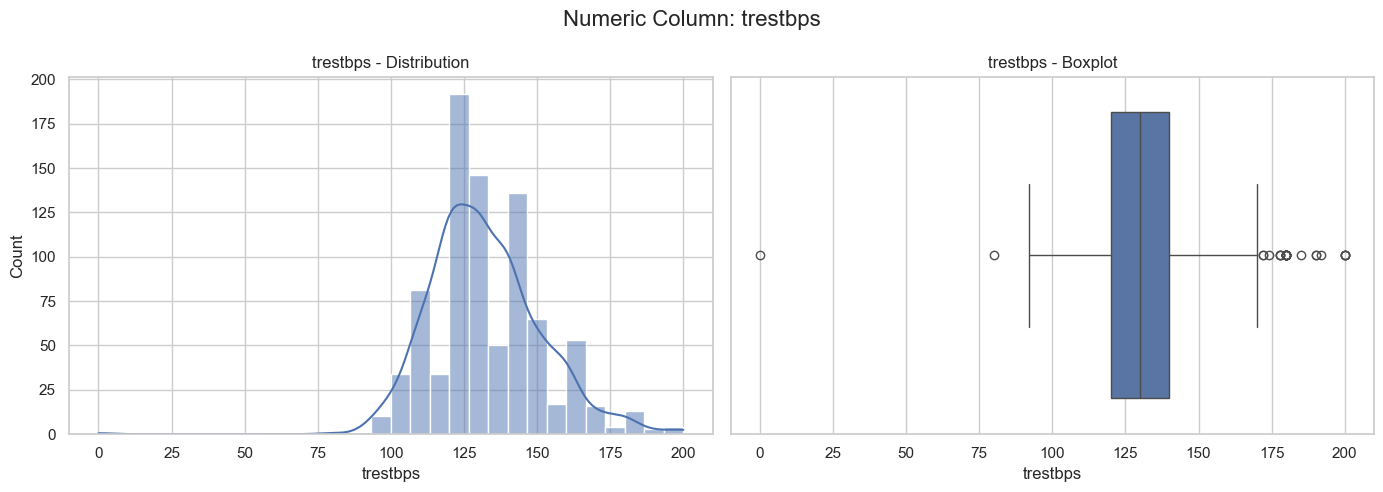


===== STATISTICS FOR chol =====
count    890.000000
mean     199.130337
std      110.780810
min        0.000000
1%         0.000000
5%         0.000000
50%      223.000000
95%      334.100000
99%      412.550000
max      603.000000
Name: chol, dtype: float64
Missing: 30
Unique: 217


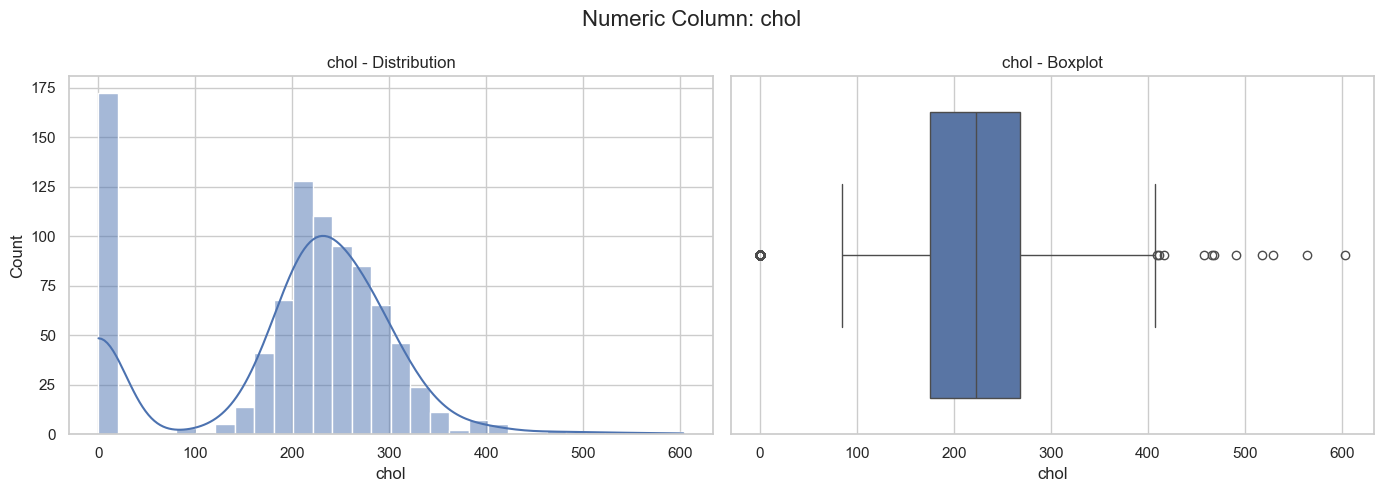


===== STATISTICS FOR thalch =====
count    865.000000
mean     137.545665
std       25.926276
min       60.000000
1%        75.560000
5%        95.000000
50%      140.000000
95%      178.000000
99%      186.360000
max      202.000000
Name: thalch, dtype: float64
Missing: 55
Unique: 119


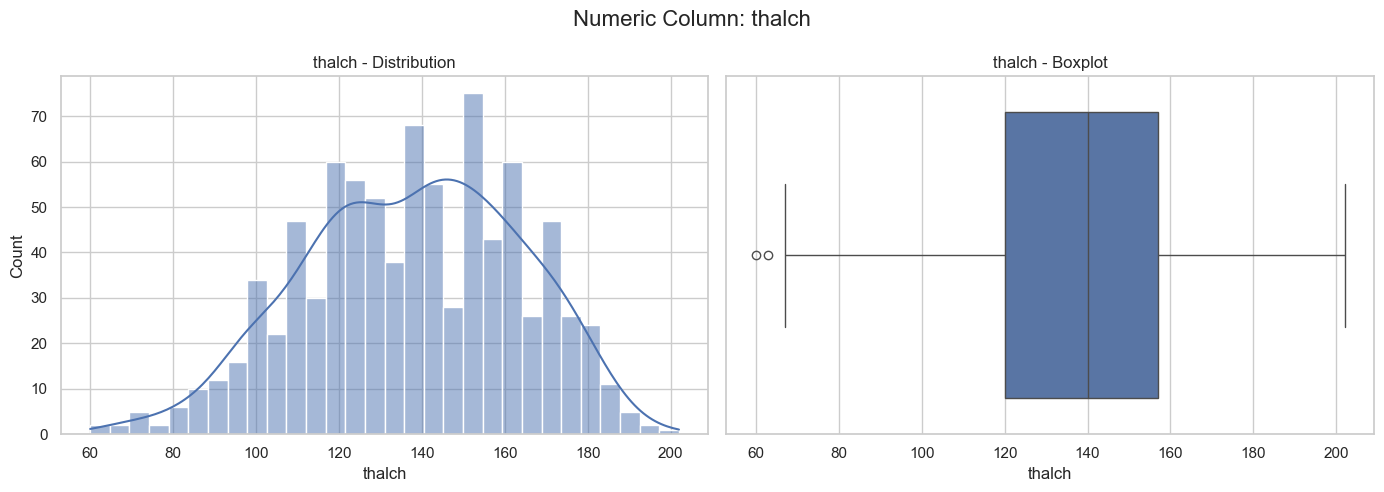


===== STATISTICS FOR oldpeak =====
count    858.000000
mean       0.878788
std        1.091226
min       -2.600000
1%        -0.586000
5%         0.000000
50%        0.500000
95%        3.000000
99%        4.000000
max        6.200000
Name: oldpeak, dtype: float64
Missing: 62
Unique: 53


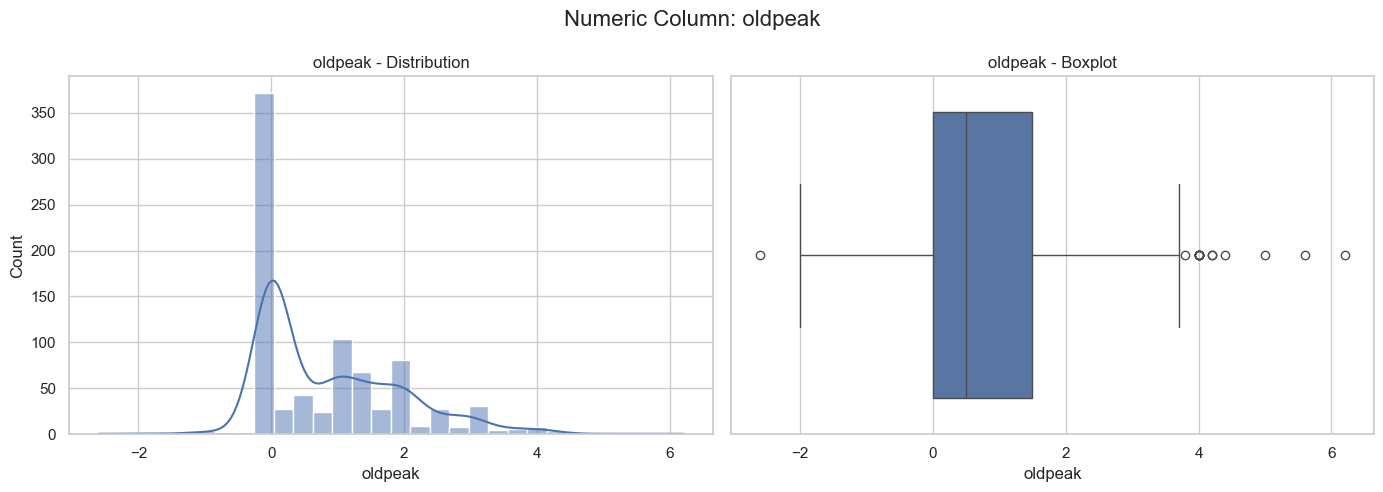


===== STATISTICS FOR ca =====
count    309.000000
mean       0.676375
std        0.935653
min        0.000000
1%         0.000000
5%         0.000000
50%        0.000000
95%        3.000000
99%        3.000000
max        3.000000
Name: ca, dtype: float64
Missing: 611
Unique: 4


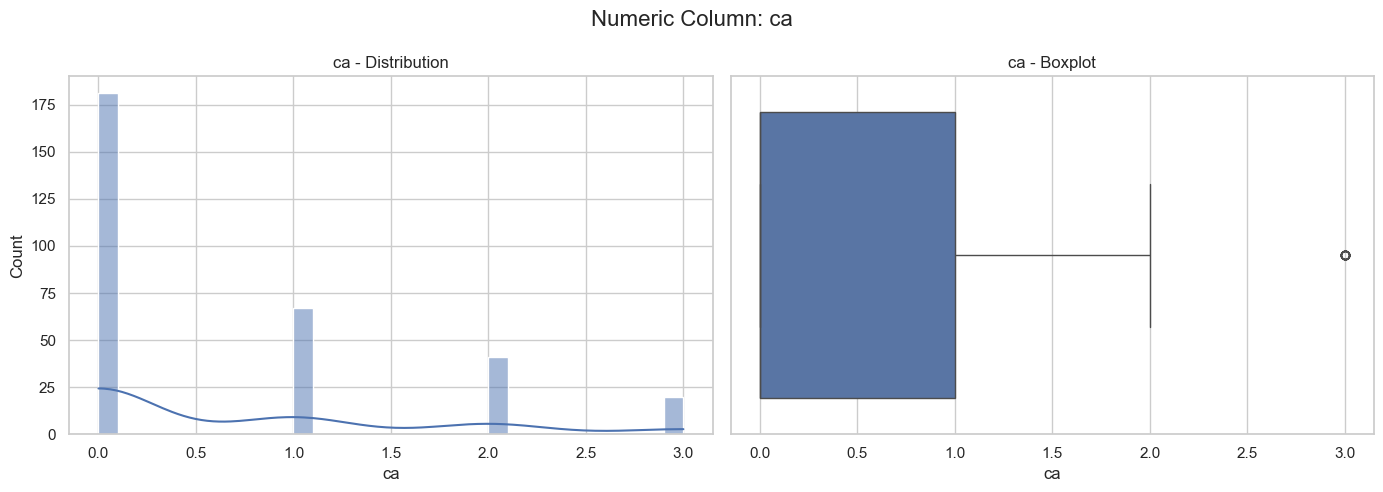

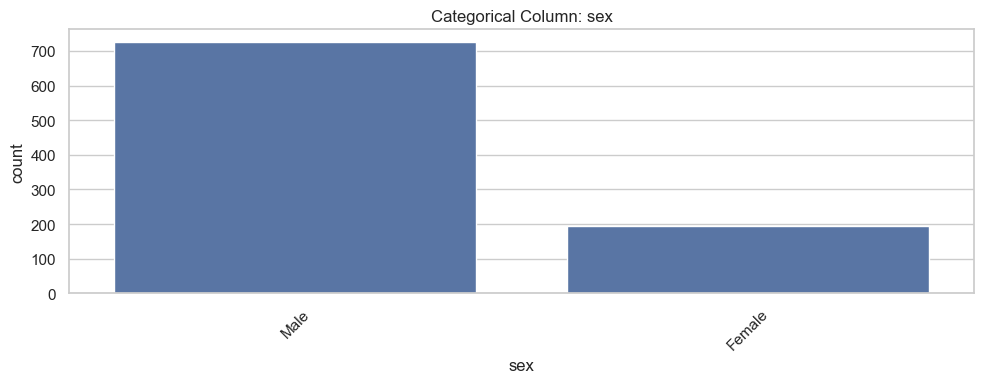

Missing: 0
Unique: 2



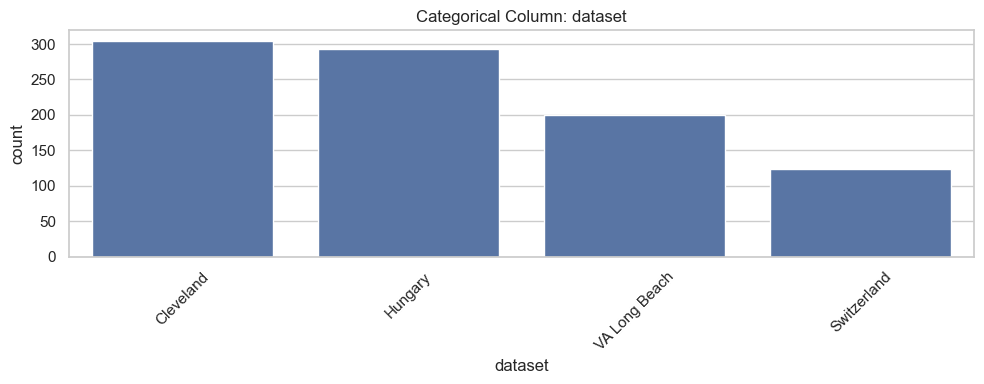

Missing: 0
Unique: 4



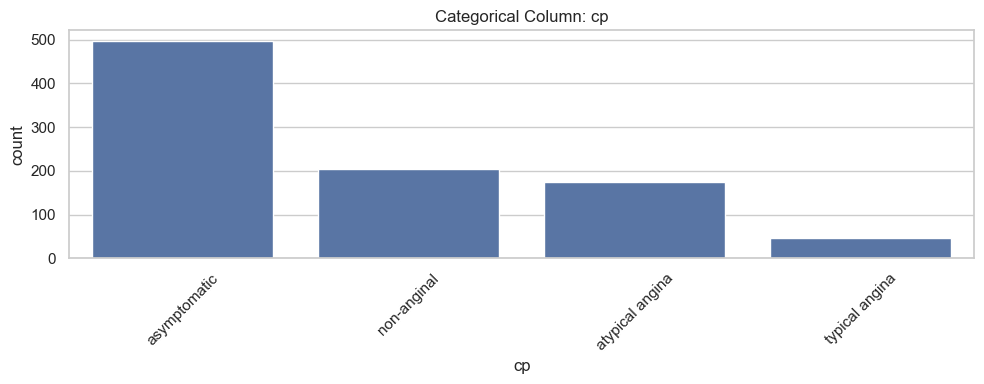

Missing: 0
Unique: 4



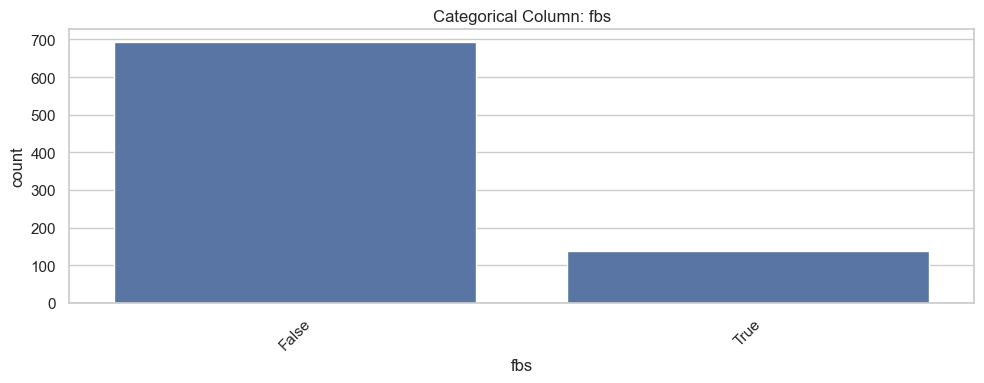

Missing: 90
Unique: 2



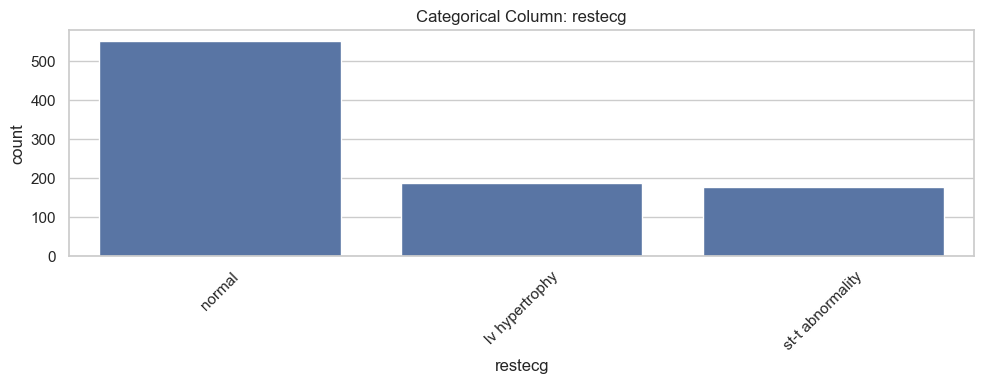

Missing: 2
Unique: 3



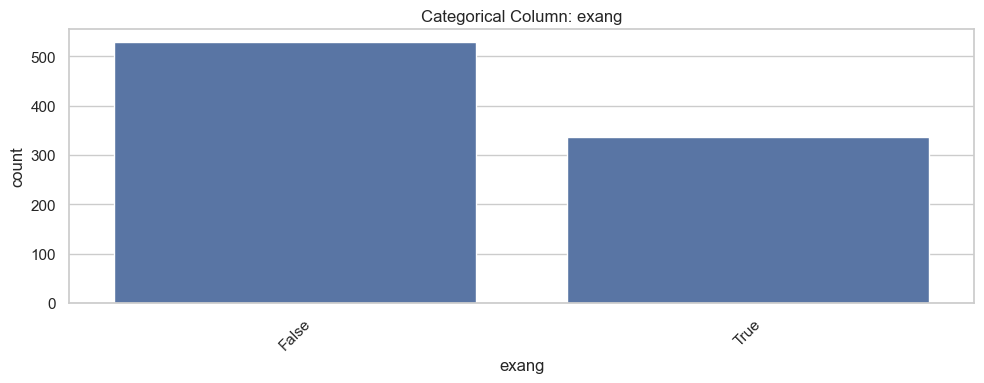

Missing: 55
Unique: 2



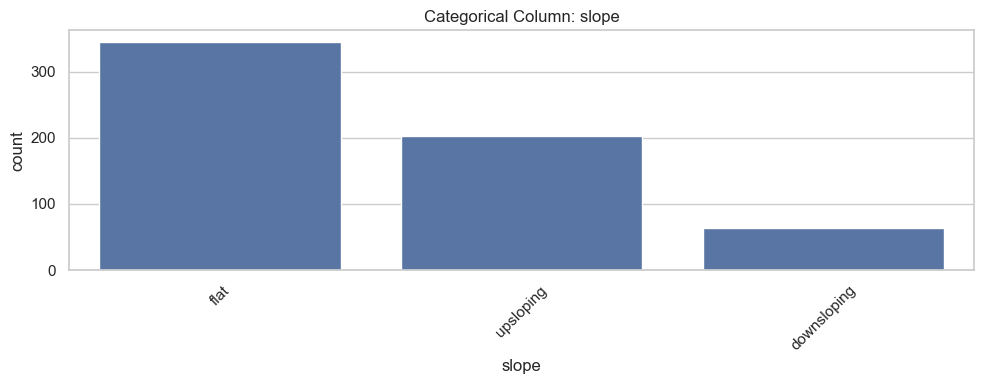

Missing: 309
Unique: 3



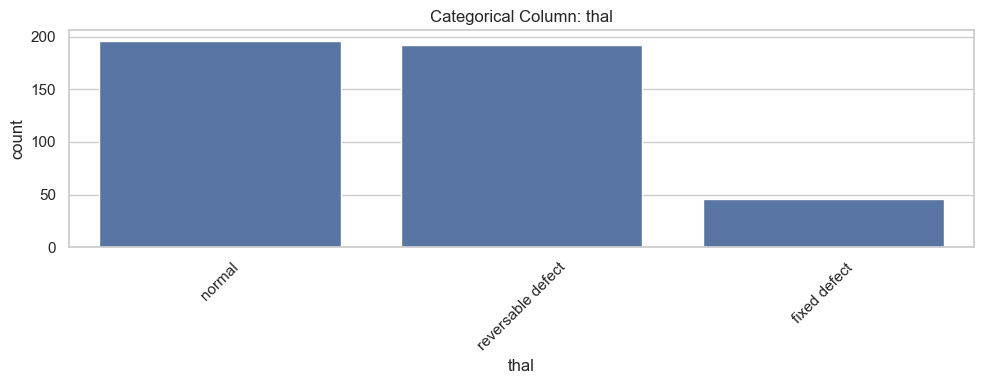

Missing: 486
Unique: 3



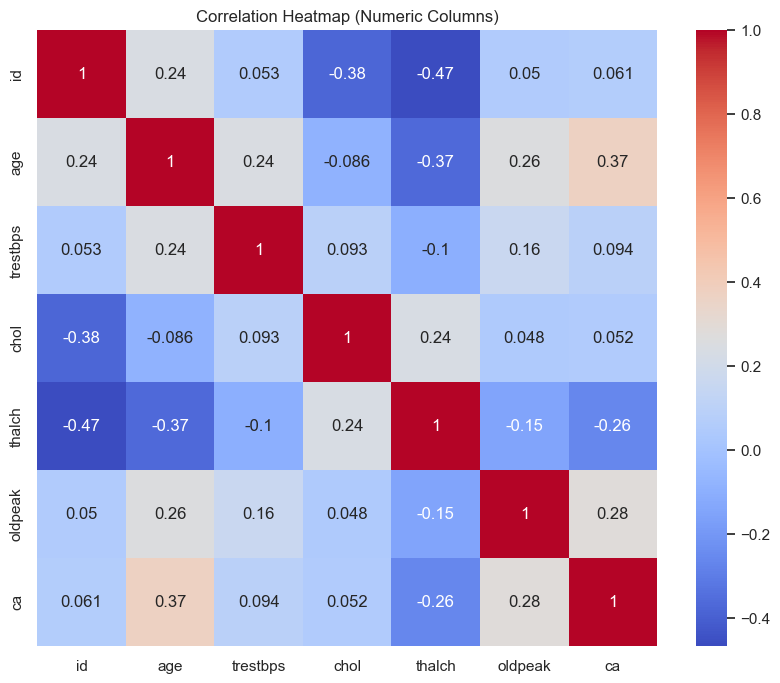

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)
# Load dataset
df = pd.read_csv("heart_disease_uci.csv")

# Rename num → target if present
if "num" in df.columns:
    df = df.rename(columns={"num": "target"})

print("Dataset Shape:", df.shape)
print("\nData Types and Non-null Counts:")
df.info()            # <-- Correct usage (not inside display)

print("\nFirst 5 Rows:")
display(df.head())

# Autodetect column types

# Identify numeric columns (but remove the target label)
numeric_cols = df.select_dtypes(include=["number"]).columns.tolist()
if "target" in numeric_cols:
    numeric_cols.remove("target")

# Identify categorical (object/string) columns
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()

print("\nNumeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)

# Neumeric Summary Statistics
numeric_summary = df[numeric_cols].describe(
    percentiles=[0.01, 0.05, 0.95, 0.99]
).T

numeric_summary["missing"] = df[numeric_cols].isna().sum()
numeric_summary["unique"] = df[numeric_cols].nunique()

print("\n=== Numeric Summary ===")
display(numeric_summary)

# Plot Numeric Columns
for col in numeric_cols:
    print(f"\n===== STATISTICS FOR {col} =====")
    print(df[col].describe(percentiles=[0.01, 0.05, 0.95, 0.99]))
    print(f"Missing: {df[col].isna().sum()}")
    print(f"Unique: {df[col].nunique()}")

    fig, axs = plt.subplots(1, 2, figsize=(14, 5))
    fig.suptitle(f"Numeric Column: {col}", fontsize=16)

    sns.histplot(df[col], kde=True, bins=30, ax=axs[0])
    axs[0].set_title(f"{col} - Distribution")

    sns.boxplot(x=df[col], ax=axs[1])
    axs[1].set_title(f"{col} - Boxplot")

    plt.tight_layout()
    plt.show()

# Plot Categorical Columns
for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Categorical Column: {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    print(f"Missing: {df[col].isna().sum()}")
    print(f"Unique: {df[col].nunique()}\n")

# Correlation Heatmap for Numeric Columns
if len(numeric_cols) > 1:
    plt.figure(figsize=(10, 8))
    sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
    plt.title("Correlation Heatmap (Numeric Columns)")
    plt.show()


In [4]:
print("Missing values per column:")
print(df.isnull().sum())
print("\nColumns:")
print(df.columns.tolist())

Missing values per column:
id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
target        0
dtype: int64

Columns:
['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


### Fix outliers, drop unwanted columns, impute numerical and categorical data to deal with missing data

In [8]:
import pandas as pd
import numpy as np

# Assuming df is already loaded, e.g.:
#df = pd.read_csv('your_original_file.csv')

""" Fix outliers and invalid values.
- trestbps (resting blood pressure): 0 is impossible → replace with median
- chol (serum cholesterol): 0 is impossible → replace with median
- oldpeak (ST depression): negative values are invalid → replace with median
"""

# === Outlier / Invalid Value Replacement ===
initial_rows = len(df)
print(f"Initial number of rows: {initial_rows}")

# Replace trestbps = 0 with median of non-zero values
trestbps_zero_count = (df['trestbps'] == 0).sum()
if trestbps_zero_count > 0:
    trestbps_median = df[df['trestbps'] != 0]['trestbps'].median()
    df.loc[df['trestbps'] == 0, 'trestbps'] = trestbps_median
    print(f"Replaced {trestbps_zero_count} rows where trestbps=0 with median: {trestbps_median:.2f}")

# Replace chol = 0 with median of non-zero values
chol_zero_count = (df['chol'] == 0).sum()
if chol_zero_count > 0:
    chol_median = df[df['chol'] != 0]['chol'].median()
    df.loc[df['chol'] == 0, 'chol'] = chol_median
    print(f"Replaced {chol_zero_count} rows where chol=0 with median: {chol_median:.2f}")

# Replace negative oldpeak with median of non-negative values
oldpeak_negative_count = (df['oldpeak'] < 0).sum()
if oldpeak_negative_count > 0:
    oldpeak_median = df[df['oldpeak'] >= 0]['oldpeak'].median()
    df.loc[df['oldpeak'] < 0, 'oldpeak'] = oldpeak_median
    print(f"Replaced {oldpeak_negative_count} rows where oldpeak<0 with median: {oldpeak_median:.2f}")

print(f"Rows after value replacement: {len(df)} (no rows removed)")

# Convert target to binary decision (heart disease present or not)
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

# Drop unwanted columns (ca has many missing/invalid, id is useless, dataset is a confounder)
df = df.drop(columns=['id', 'ca', 'dataset'], errors='ignore')
print("Removed columns: id, ca, dataset (dataset removed to improve generalizability)")

# Numeric/Categorical detection
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols.remove('target')  # exclude target from imputation/scaling later
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# === Imputation ===
# Numeric: median imputation + missing indicator
for col in numeric_cols:
    df[f'{col}_missing'] = df[col].isna().astype(int)
    df[col] = df[col].fillna(df[col].median())

# Categorical: fill with 'missing'
for col in categorical_cols:
    df[col] = df[col].fillna('missing')

# === Optional: Display numeric summary after cleaning ===
def summary_table(df):
    summary = pd.DataFrame()
    numeric_columns = df.select_dtypes(include=[np.number]).columns

    for col in numeric_columns:
        series = df[col]
        summary.loc[col, 'count'] = series.count()
        summary.loc[col, 'mean'] = series.mean()
        summary.loc[col, 'std'] = series.std()
        summary.loc[col, 'min'] = series.min()
        summary.loc[col, '1%'] = series.quantile(0.01)
        summary.loc[col, '5%'] = series.quantile(0.05)
        summary.loc[col, '50%'] = series.quantile(0.50)
        summary.loc[col, '95%'] = series.quantile(0.95)
        summary.loc[col, '99%'] = series.quantile(0.99)
        summary.loc[col, 'max'] = series.max()
        summary.loc[col, 'missing'] = series.isna().sum()
        summary.loc[col, 'unique'] = series.nunique()

    return summary

numeric_summary = summary_table(df)

print("\n=== Numeric Summary Table (After Cleaning) ===")
display(numeric_summary)

# === Save the cleaned dataset ===
output_path = 'cleveland_heart_cleaned.csv'
df.to_csv(output_path, index=False)
print(f"\nCleaned dataset saved to: {output_path}")

Initial number of rows: 920
Rows after value replacement: 920 (no rows removed)
Removed columns: id, ca, dataset (dataset removed to improve generalizability)

=== Numeric Summary Table (After Cleaning) ===


,count,mean,std,min,1%,5%,50%,95%,99%,max,missing,unique
age,920.0,53.510870,9.424685,28.0,32.00,37.0,54.0,68.0,74.00,77.0,0.0,50.0
trestbps,920.0,132.136957,17.929761,80.0,95.19,107.9,130.0,160.0,180.00,200.0,0.0,60.0
chol,920.0,245.222826,51.785328,85.0,141.19,173.0,239.5,331.1,411.43,603.0,0.0,217.0
thalch,920.0,137.692391,25.145235,60.0,77.19,96.0,140.0,178.0,186.00,202.0,0.0,119.0
oldpeak,920.0,0.873587,1.033091,0.0,0.00,0.0,0.5,3.0,4.00,6.2,0.0,43.0
target,920.0,0.553261,0.497426,0.0,0.00,0.0,1.0,1.0,1.00,1.0,0.0,2.0
age_missing,920.0,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,1.0
trestbps_missing,920.0,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,1.0
chol_missing,920.0,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,1.0
thalch_missing,920.0,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,1.0



Cleaned dataset saved to: cleveland_heart_cleaned.csv


### Create a more readible table

In [14]:
from IPython.display import display, HTML

# Wrap the DataFrame in a scrollable div
def display_scrollable(df, max_height=400):
    display(HTML(f"""
    <div style="max-height: {max_height}px; overflow-y: auto; border:1px solid #ccc;">
        {df.to_html()}
    </div>
    """))

# Example usage
display_scrollable(df.head(50))

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,target,age_missing,trestbps_missing,chol_missing,thalch_missing,oldpeak_missing,age_missing_missing,trestbps_missing_missing,chol_missing_missing,thalch_missing_missing,oldpeak_missing_missing
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,fixed defect,0,0,0,0,0,0,0,0,0,0,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,normal,1,0,0,0,0,0,0,0,0,0,0
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,reversable defect,1,0,0,0,0,0,0,0,0,0,0
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,normal,0,0,0,0,0,0,0,0,0,0,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,normal,0,0,0,0,0,0,0,0,0,0,0
5,56,Male,atypical angina,120.0,236.0,False,normal,178.0,False,0.8,upsloping,normal,0,0,0,0,0,0,0,0,0,0,0
6,62,Female,asymptomatic,140.0,268.0,False,lv hypertrophy,160.0,False,3.6,downsloping,normal,1,0,0,0,0,0,0,0,0,0,0
7,57,Female,asymptomatic,120.0,354.0,False,normal,163.0,True,0.6,upsloping,normal,0,0,0,0,0,0,0,0,0,0,0
8,63,Male,asymptomatic,130.0,254.0,False,lv hypertrophy,147.0,False,1.4,flat,reversable defect,1,0,0,0,0,0,0,0,0,0,0
9,53,Male,asymptomatic,140.0,203.0,True,lv hypertrophy,155.0,True,3.1,downsloping,reversable defect,1,0,0,0,0,0,0,0,0,0,0


### Split into test and train, one-hot encode categorical data, convert booleans to int for stats, scale numeric features

=== First 10 rows of transformed X ===


,age,trestbps,chol,thalch,oldpeak,age_missing,trestbps_missing,chol_missing,thalch_missing,oldpeak_missing,...,restecg_normal,restecg_st-t abnormality,exang_True,exang_missing,slope_flat,slope_missing,slope_upsloping,thal_missing,thal_normal,thal_reversable defect
0,63,145.0,233.0,150.0,2.3,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1,67,160.0,286.0,108.0,1.5,0,0,0,0,0,...,False,False,True,False,True,False,False,False,True,False
2,67,120.0,229.0,129.0,2.6,0,0,0,0,0,...,False,False,True,False,True,False,False,False,False,True
3,37,130.0,250.0,187.0,3.5,0,0,0,0,0,...,True,False,False,False,False,False,False,False,True,False
4,41,130.0,204.0,172.0,1.4,0,0,0,0,0,...,False,False,False,False,False,False,True,False,True,False
5,56,120.0,236.0,178.0,0.8,0,0,0,0,0,...,True,False,False,False,False,False,True,False,True,False
6,62,140.0,268.0,160.0,3.6,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
7,57,120.0,354.0,163.0,0.6,0,0,0,0,0,...,True,False,True,False,False,False,True,False,True,False
8,63,130.0,254.0,147.0,1.4,0,0,0,0,0,...,False,False,False,False,True,False,False,False,False,True
9,53,140.0,203.0,155.0,3.1,0,0,0,0,0,...,False,False,True,False,False,False,False,False,False,True



=== Numerical summary of transformed X ===



,count,mean,std,min,1%,5%,50%,95%,99%,max,missing,unique
age,920.0,53.510870,9.424685,28.0,32.00,37.0,54.0,68.00,74.00,77.0,0.0,50.0
trestbps,920.0,132.136957,17.929761,80.0,95.19,107.9,130.0,160.00,180.00,200.0,0.0,60.0
chol,920.0,245.222826,51.785328,85.0,141.19,173.0,239.5,331.10,411.43,603.0,0.0,217.0
thalch,920.0,137.692391,25.145235,60.0,77.19,96.0,140.0,178.00,186.00,202.0,0.0,119.0
oldpeak,920.0,0.873587,1.033091,0.0,0.00,0.0,0.5,3.00,4.00,6.2,0.0,43.0
age_missing,920.0,0.000000,0.000000,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,1.0
trestbps_missing,920.0,0.000000,0.000000,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,1.0
chol_missing,920.0,0.000000,0.000000,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,1.0
thalch_missing,920.0,0.000000,0.000000,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,1.0
oldpeak_missing,920.0,0.000000,0.000000,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,1.0


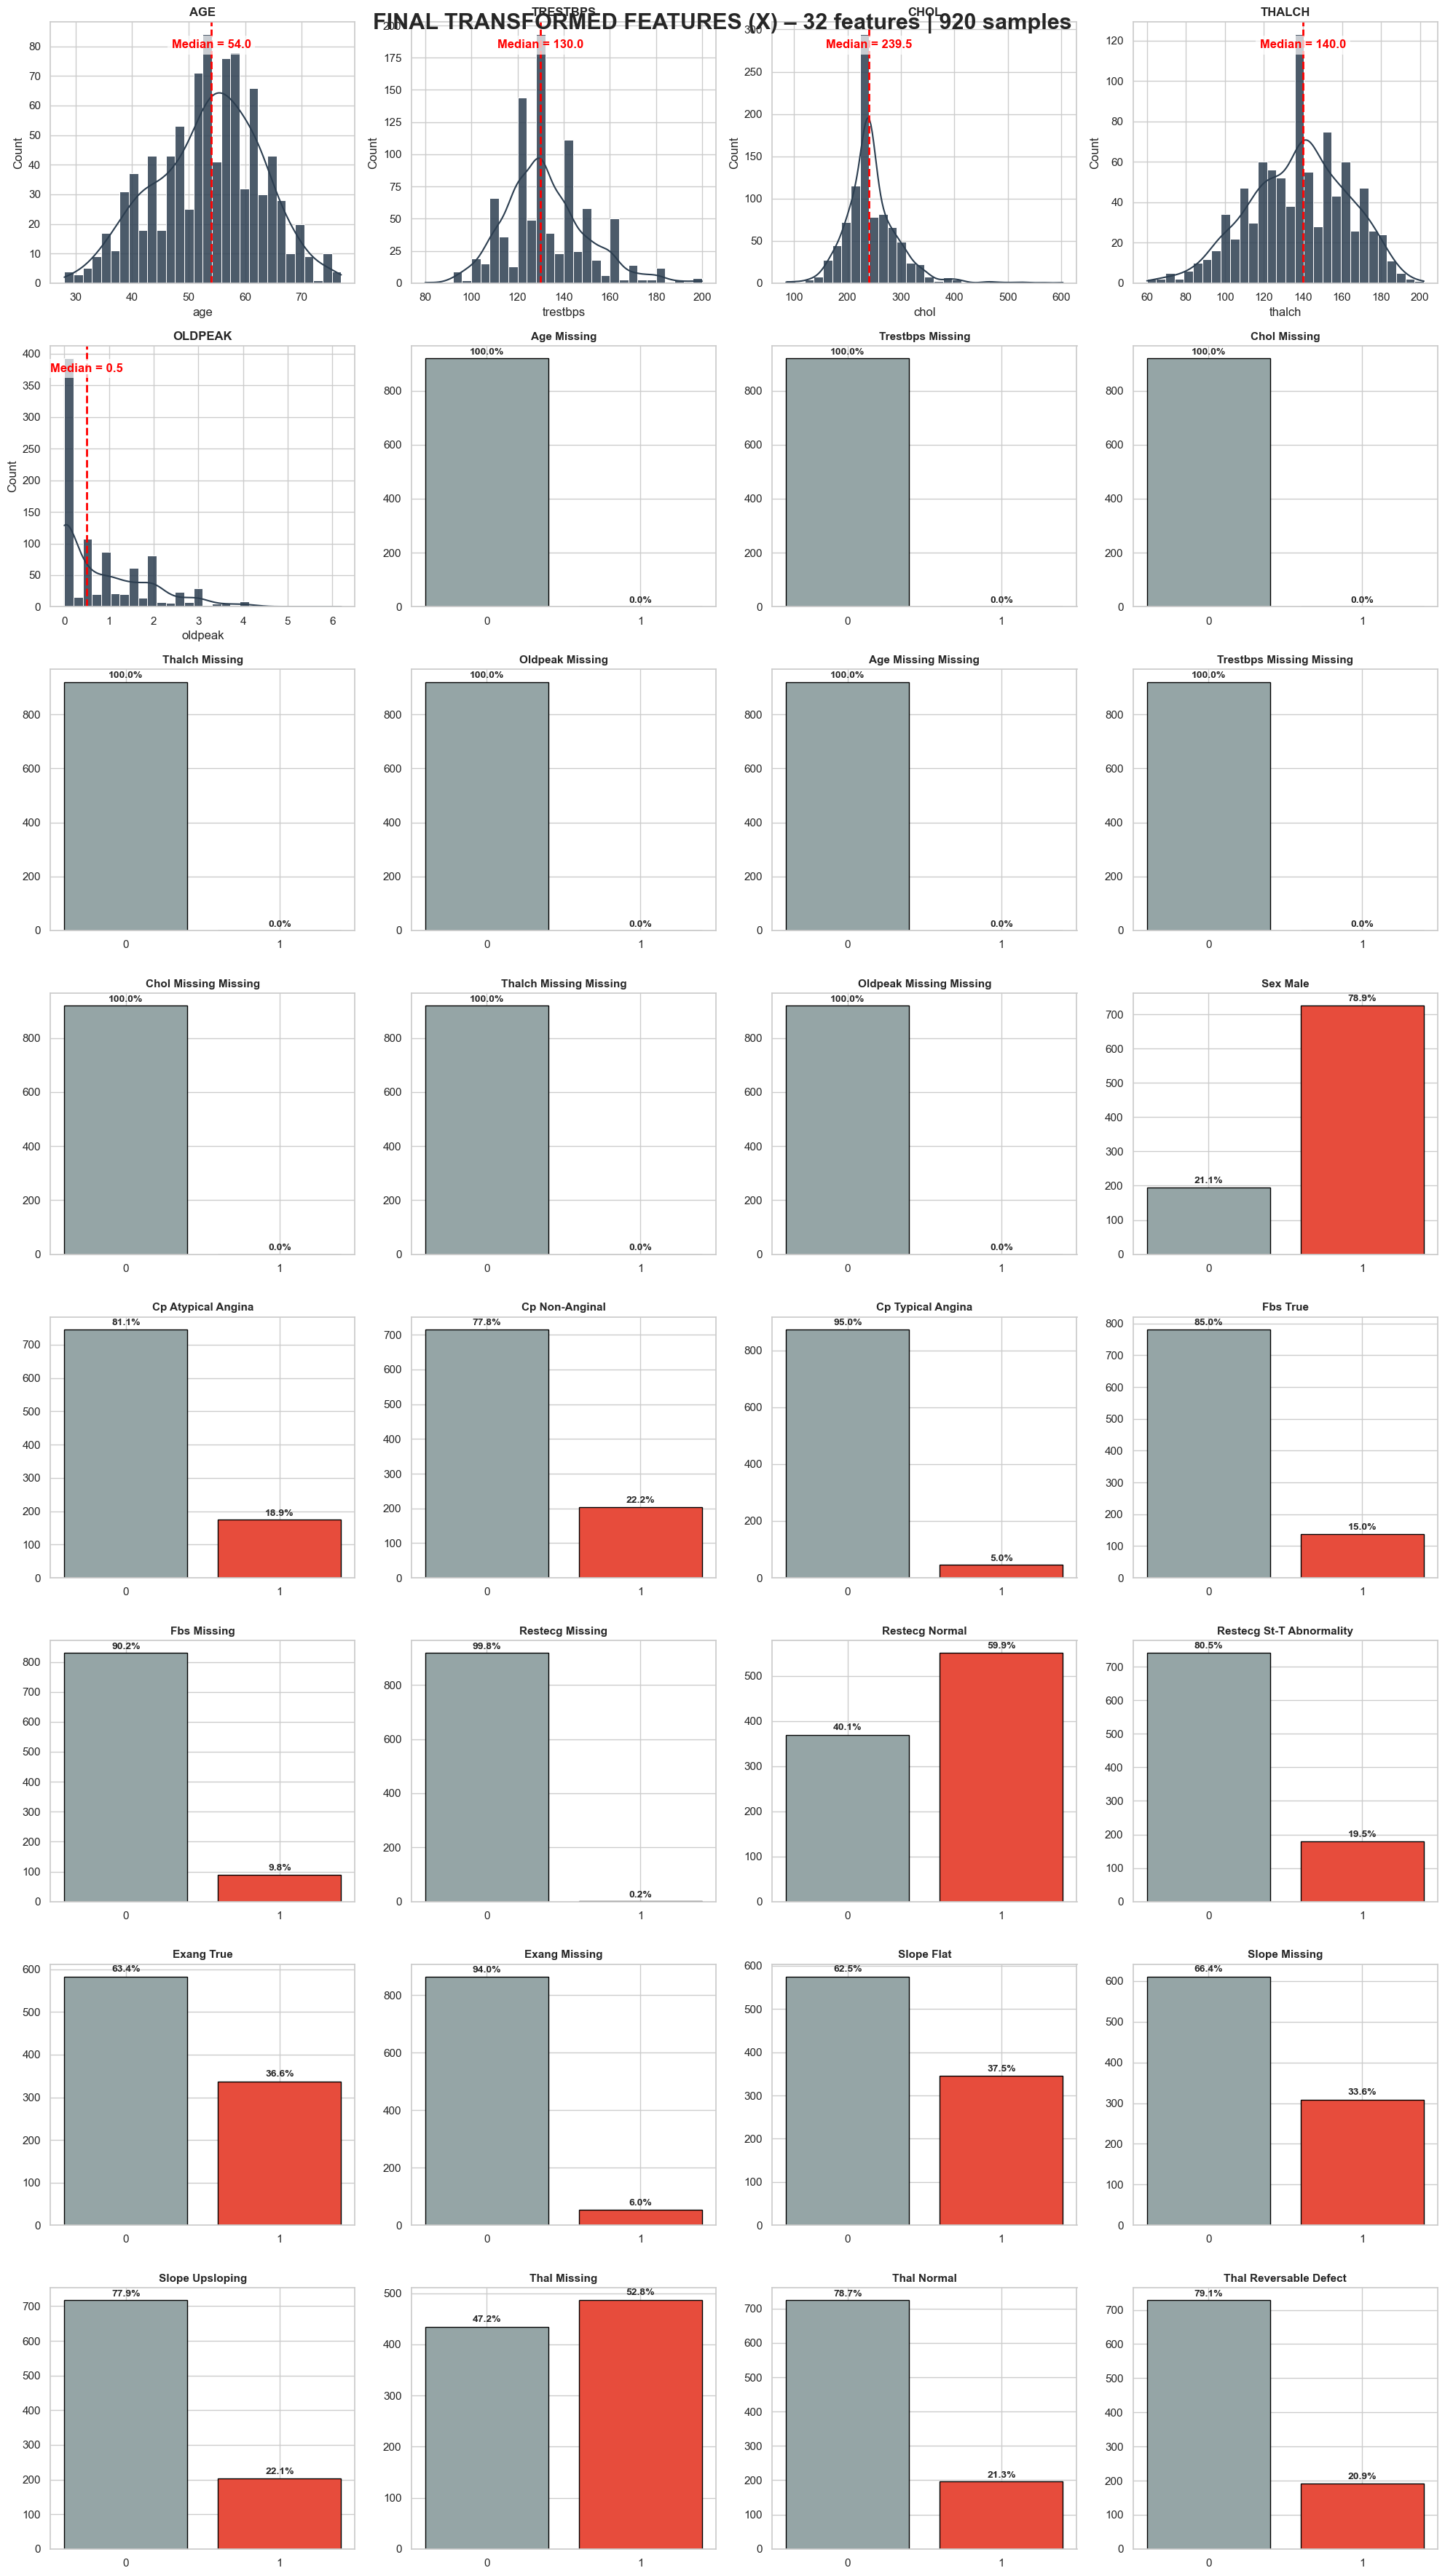

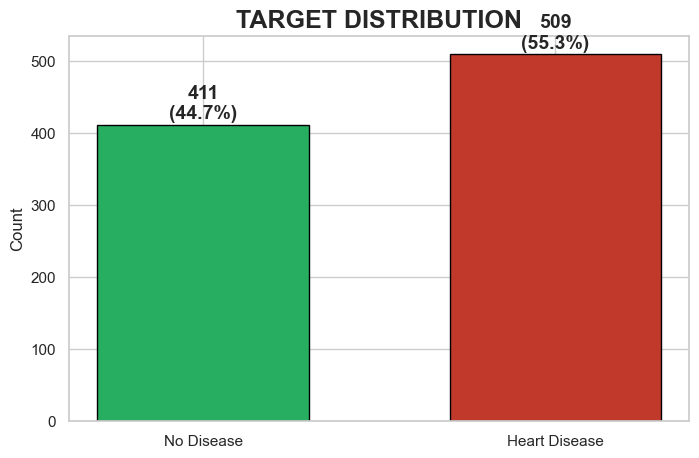

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split features and target
X = df.drop(columns=['target'])
y = df['target']

# One-hot encode categorical variables
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Display the first few rows
print("=== First 10 rows of transformed X ===")
display(X.head(10))

# Display numerical summary of transformed X
def summary_table(df):
    summary = pd.DataFrame()
    for col in df.columns:
        series = df[col]
        summary[col] = [
            series.count(),
            series.mean(),
            series.std(),
            series.min(),
            series.quantile(0.01),
            series.quantile(0.05),
            series.quantile(0.50),
            series.quantile(0.95),
            series.quantile(0.99),
            series.max(),
            df[col].isna().sum(),
            df[col].nunique()
        ]
    summary.index = ['count','mean','std','min','1%','5%','50%','95%','99%','max','missing','unique']
    return summary.T

# Convert booleans to int
bool_cols = X.select_dtypes(include='bool').columns
X[bool_cols] = X[bool_cols].astype(int)

summary = summary_table(X)
print("\n=== Numerical summary of transformed X ===\n")
display(summary)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

# Standardize numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# Convert scaled arrays back to DataFrames with column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

# Visual summary of all features in X
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# Auto-detect numeric columns (those that aren't binary or missing indicators)
numeric_cols = [col for col in X.columns 
                if not col.endswith('_missing') 
                and X[col].nunique() > 2]  # More than 2 unique values = likely continuous

binary_cols = [c for c in X.columns if c not in numeric_cols]

n_features   = len(X.columns)
n_cols_grid  = 4
n_rows_grid  = (n_features + n_cols_grid - 1) // n_cols_grid

plt.figure(figsize=(20, 4.5 * n_rows_grid))

for i, col in enumerate(X.columns, 1):
    plt.subplot(n_rows_grid, n_cols_grid, i)
    
    if col in numeric_cols:
        # Continuous variables
        sns.histplot(X[col], kde=True, color='#2c3e50', bins=30, alpha=0.85)
        median_val = X[col].median()
        plt.axvline(median_val, color='red', linestyle='--', linewidth=2)
        plt.text(median_val, plt.ylim()[1]*0.9,
                 f'Median = {median_val:.1f}', color='red',
                 ha='center', fontweight='bold',
                 bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))
        plt.title(col.upper(), fontweight='bold', fontsize=12)
    else:
        # Binary / one-hot / missing indicators
        counts = X[col].value_counts().sort_index()
        bars = plt.bar(['0', '1'], counts.reindex([0,1], fill_value=0),
                       color=['#95a5a6', '#e74c3c'], edgecolor='black')
        plt.title(col.replace('_', ' ').title(), fontweight='bold', fontsize=11)
        for bar in bars:
            h = bar.get_height()
            pct = h / len(X) * 100
            plt.text(bar.get_x() + bar.get_width()/2, h + 6,
                     f'{pct:.1f}%', ha='center', va='bottom',
                     fontweight='bold', fontsize=10)

plt.suptitle(
    f'FINAL TRANSFORMED FEATURES (X) – {n_features} features | {X.shape[0]} samples',
    fontsize=22, fontweight='bold', y=0.98
)
plt.tight_layout()
plt.show()

# Bonus: Target distribution
plt.figure(figsize=(8,5))
counts = y.value_counts().sort_index()
plt.bar(['No Disease', 'Heart Disease'], counts.values,
        color=['#27ae60', '#c0392b'], edgecolor='black', width=0.6)
for i, v in enumerate(counts.values):
    plt.text(i, v + 8, f'{v}\n({v/len(y)*100:.1f}%)',
             ha='center', fontweight='bold', fontsize=14)
plt.title('TARGET DISTRIBUTION', fontsize=18, fontweight='bold')
plt.ylabel('Count')
plt.show()

### Train models and analysis


=== Model Performance Comparison ===

                 Model  Accuracy  Precision  Recall      F1  ROC-AUC
0  Logistic Regression    0.8533     0.8571  0.8824  0.8696   0.9149
3     SVM (RBF Kernel)    0.8478     0.8304  0.9118  0.8692   0.9100
1        Random Forest    0.8315     0.8318  0.8725  0.8517   0.9058
2              XGBoost    0.8315     0.8381  0.8627  0.8502   0.8777


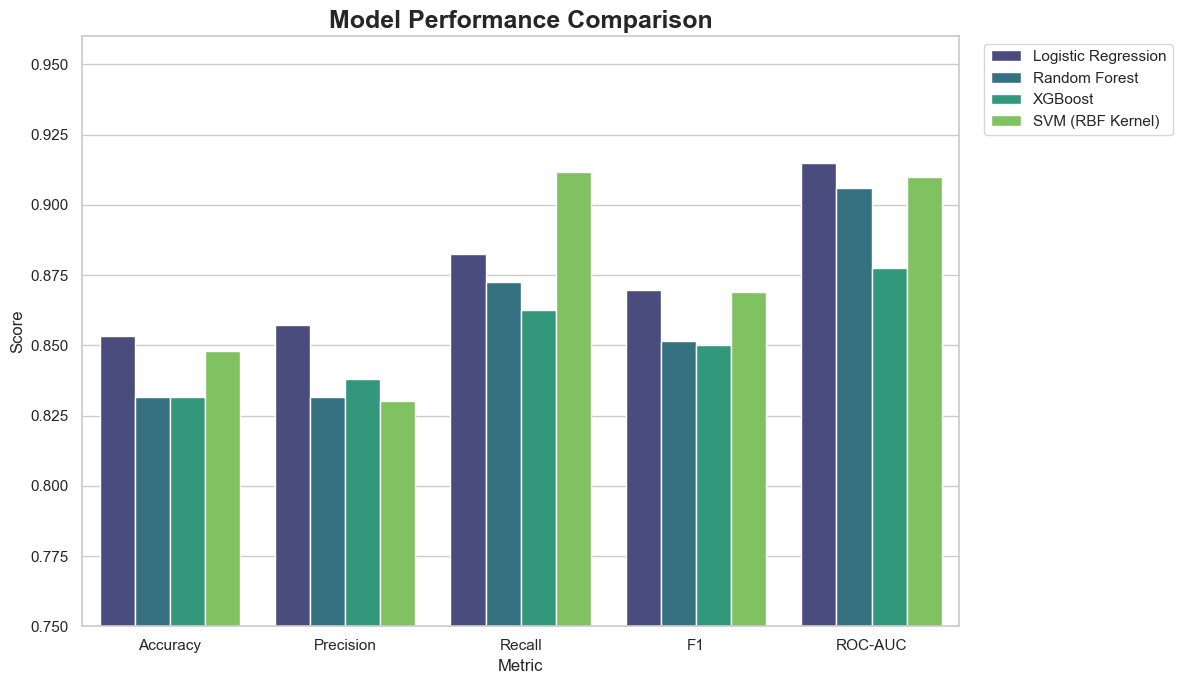

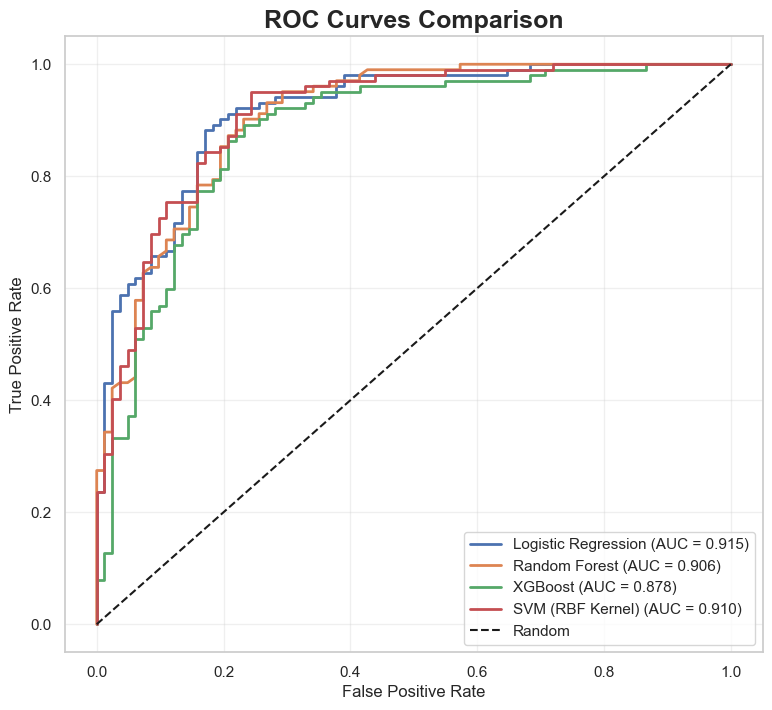

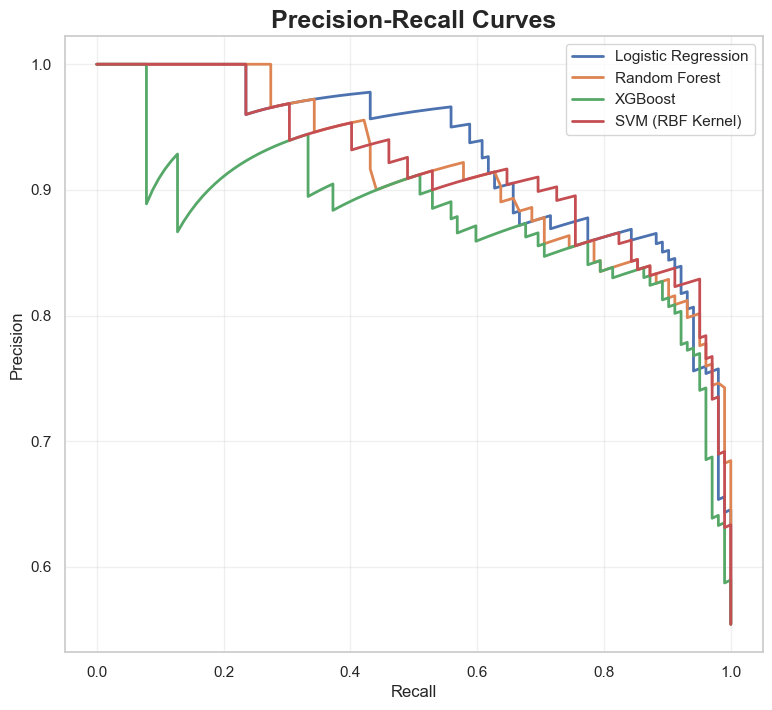

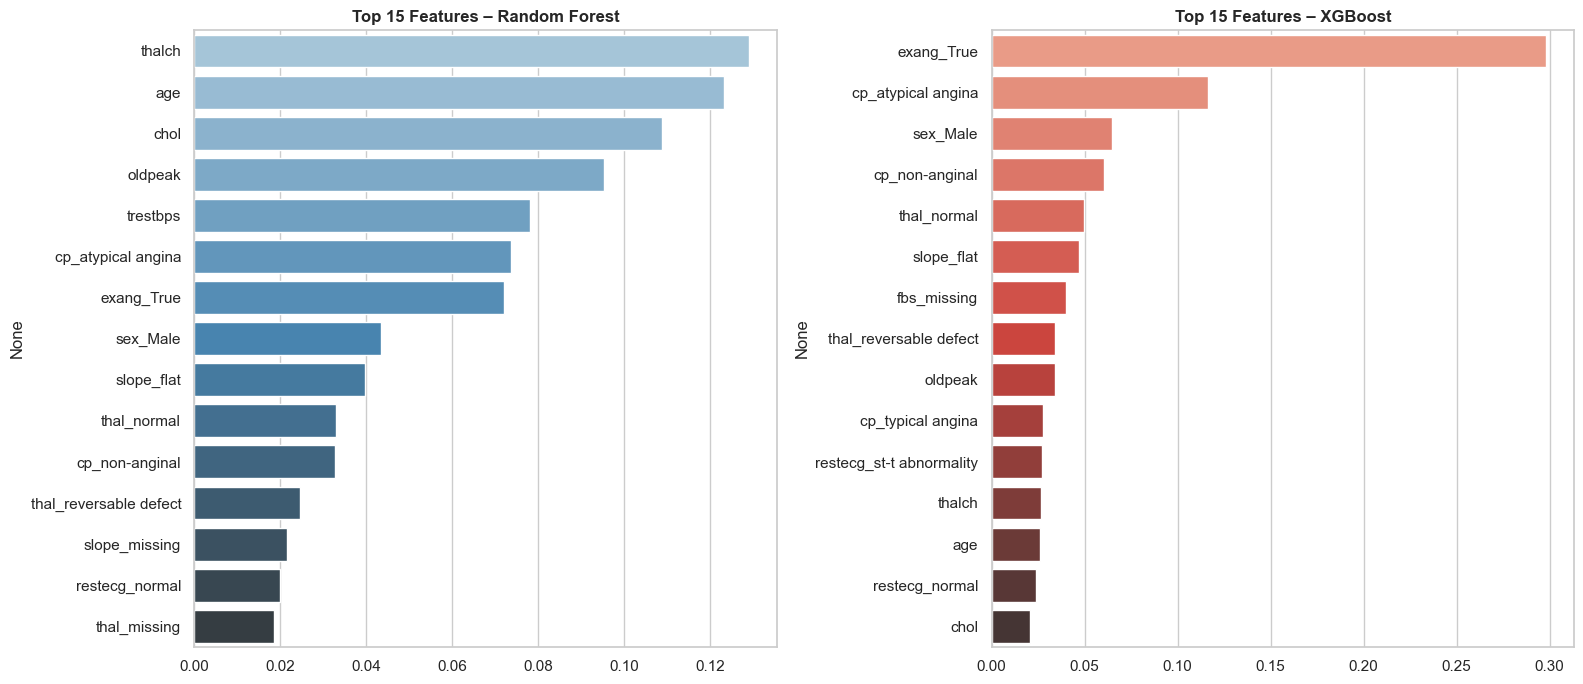

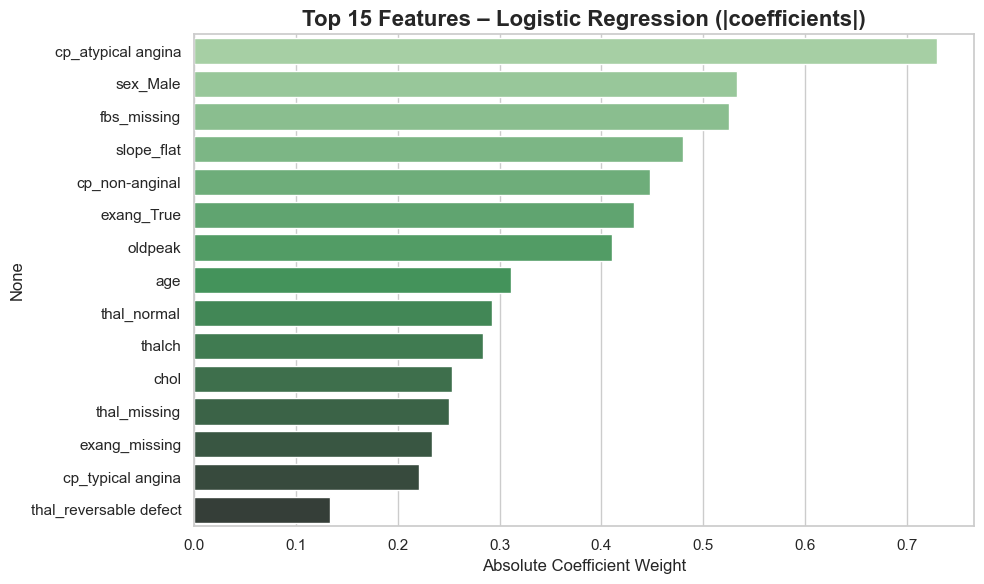

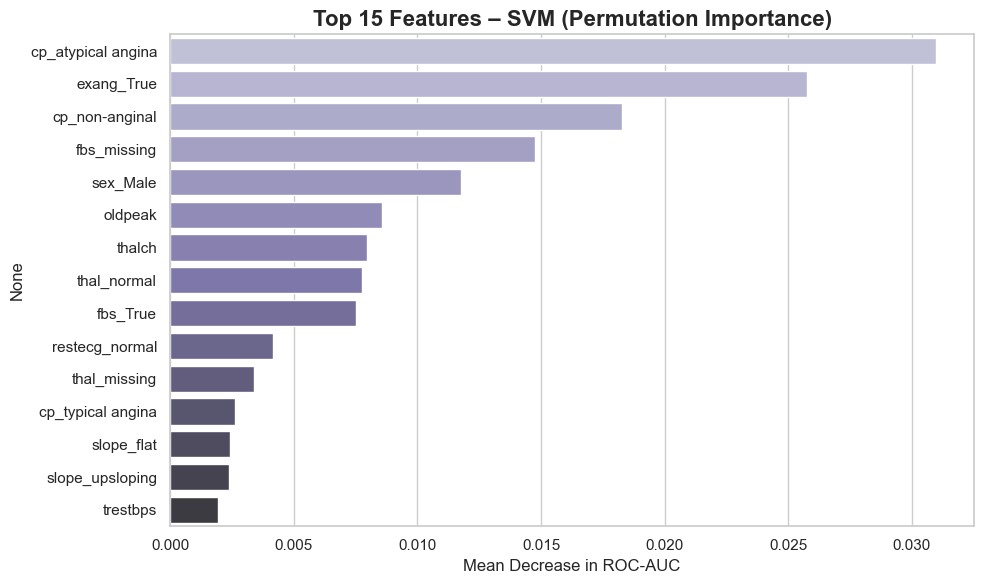

Top 2 features for plotting: ['cp_atypical angina', 'sex_Male']


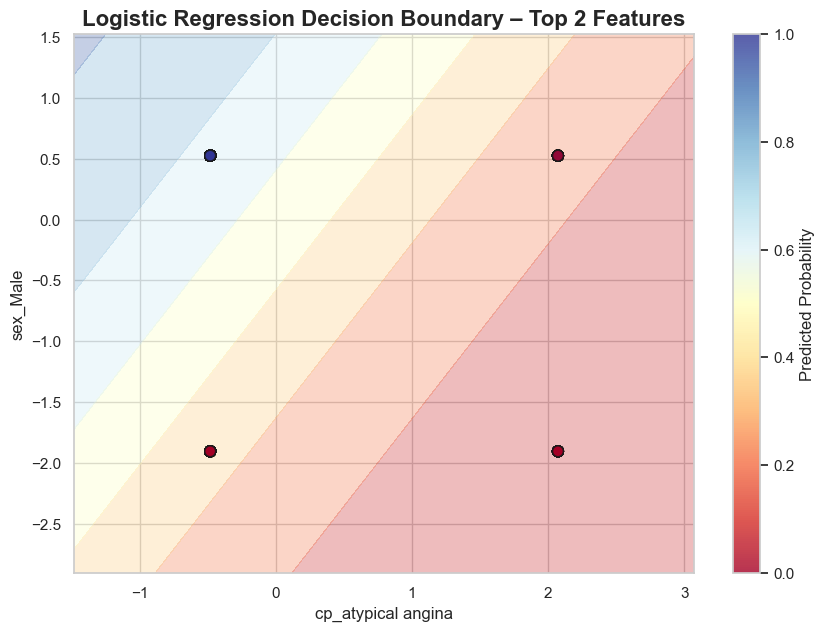

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, roc_curve, precision_recall_curve)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Train various models and compare performance

models = {
    "Logistic Regression": LogisticRegression(max_iter=2000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=500, max_depth=None, random_state=42),
    "XGBoost": XGBClassifier(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=3,
        subsample=0.9,
        colsample_bytree=0.9,
        random_state=42,
        enable_categorical=False  # Added to avoid warnings
    ),
    "SVM (RBF Kernel)": SVC(kernel='rbf', probability=True, random_state=42)
}

results = []
predictions = {}  # store probabilities for ROC/PR curves

for name, model in models.items():
    if name in ["Logistic Regression", "SVM (RBF Kernel)"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_prob = model.predict_proba(X_test_scaled)[:, 1]
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]

    predictions[name] = y_prob

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, zero_division=0),
        "Recall": recall_score(y_test, y_pred, zero_division=0),
        "F1": f1_score(y_test, y_pred, zero_division=0),
        "ROC-AUC": roc_auc_score(y_test, y_prob)
    })

# Show results
results_df = pd.DataFrame(results)
print("\n=== Model Performance Comparison ===\n")
print(results_df.sort_values(by="ROC-AUC", ascending=False).round(4))

# Graphical summaries of model performance
sns.set_style("whitegrid")

# 1. Bar plot of all metrics
results_melt = results_df.melt(id_vars="Model",
                               value_vars=["Accuracy", "Precision", "Recall", "F1", "ROC-AUC"],
                               var_name="Metric", value_name="Score")

plt.figure(figsize=(12, 7))
sns.barplot(data=results_melt, x="Metric", y="Score", hue="Model", palette="viridis")
plt.title("Model Performance Comparison", fontsize=18, fontweight='bold')
plt.ylim(0.75, 0.96)
plt.legend(title='', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 2. ROC Curves
plt.figure(figsize=(9, 8))
for name in models.keys():
    fpr, tpr, _ = roc_curve(y_test, predictions[name])
    auc = roc_auc_score(y_test, predictions[name])
    plt.plot(fpr, tpr, linewidth=2, label=f"{name} (AUC = {auc:.3f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison', fontsize=18, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# 3. Precision-Recall Curves
plt.figure(figsize=(9, 8))
for name in models.keys():
    precision, recall, _ = precision_recall_curve(y_test, predictions[name])
    plt.plot(recall, precision, linewidth=2, label=name)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves', fontsize=18, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# 4. Feature Importance (Top 15) – RF & XGBoost
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Random Forest
rf_imp = pd.Series(models["Random Forest"].feature_importances_, index=X_train.columns).nlargest(15)
sns.barplot(x=rf_imp.values, y=rf_imp.index, ax=axes[0], palette="Blues_d")
axes[0].set_title("Top 15 Features – Random Forest", fontweight='bold')

# XGBoost
xgb_imp = pd.Series(models["XGBoost"].feature_importances_, index=X_train.columns).nlargest(15)
sns.barplot(x=xgb_imp.values, y=xgb_imp.index, ax=axes[1], palette="Reds_d")
axes[1].set_title("Top 15 Features – XGBoost", fontweight='bold')

plt.tight_layout()
plt.show()

# feature importance for Logistic Regression via coefficients

log_model = models["Logistic Regression"]

# coefficients → importance by absolute magnitude
log_importance = pd.Series(
    abs(log_model.coef_[0]),
    index=X_train_scaled.columns if hasattr(X_train_scaled, 'columns') else X_train.columns
).sort_values(ascending=False).head(15)

plt.figure(figsize=(10, 6))
sns.barplot(x=log_importance.values, y=log_importance.index, palette="Greens_d")
plt.title("Top 15 Features – Logistic Regression (|coefficients|)", fontsize=16, fontweight='bold')
plt.xlabel("Absolute Coefficient Weight")
plt.tight_layout()
plt.show()


# Feature importance for SVM via Permutation Importance
from sklearn.inspection import permutation_importance

svm_model = models["SVM (RBF Kernel)"]

# Use scaled test set for SVM
perm = permutation_importance(
    svm_model,
    X_test_scaled,
    y_test,
    n_repeats=20,
    random_state=42,
    scoring="roc_auc"
)

svm_importance = pd.Series(
    perm.importances_mean,
    index=X_train_scaled.columns if hasattr(X_train_scaled, 'columns') else X_train.columns
).sort_values(ascending=False).head(15)

plt.figure(figsize=(10, 6))
sns.barplot(x=svm_importance.values, y=svm_importance.index, palette="Purples_d")
plt.title("Top 15 Features – SVM (Permutation Importance)", fontsize=16, fontweight='bold')
plt.xlabel("Mean Decrease in ROC-AUC")
plt.tight_layout()
plt.show()

# Logistic Regression – Plot top 2 features with decision boundary

import numpy as np

# Identify top 2 features by absolute coefficient
top2_features = log_importance.index[:2].tolist()
print("Top 2 features for plotting:", top2_features)

# Get feature indices
feature_indices = [list(X_train.columns).index(f) for f in top2_features]

# Extract training data for these two features
if hasattr(X_train_scaled, 'iloc'):
    X_plot = X_train_scaled.iloc[:, feature_indices].values
else:
    X_plot = X_train_scaled[:, feature_indices]
    
y_plot = y_train.values if hasattr(y_train, 'values') else y_train

# Fit a logistic regression model on just these 2 features
log2 = LogisticRegression(random_state=42)
log2.fit(X_plot, y_plot)

# Create mesh grid for decision boundary
x_min, x_max = X_plot[:,0].min() - 1, X_plot[:,0].max() + 1
y_min, y_max = X_plot[:,1].min() - 1, X_plot[:,1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Predict probabilities for the grid
Z = log2.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(10,7))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
plt.scatter(X_plot[:,0], X_plot[:,1], c=y_plot, s=60,
            cmap=plt.cm.RdYlBu, edgecolor='k', alpha=0.8)
plt.xlabel(top2_features[0])
plt.ylabel(top2_features[1])
plt.title("Logistic Regression Decision Boundary – Top 2 Features", fontsize=16, fontweight='bold')
plt.colorbar(label="Predicted Probability")
plt.show()

## How to interpret Logistic Regression Decision Boundry

### If the model separates the two classes well:
Most red points will be in the red region, and most blue points in the blue region.
Misclassifications appear as points in the “wrong” colored background.
Since we only plotted the top 2 features, the model ignores all other features:

This graph gives an approximation of decision-making in a 2D view.

In reality, logistic regression uses all features in higher dimensions, so the real decision boundary is more complex.

## Further analysis for R and R2


=== Model Performance Comparison ===

                 Model  Accuracy  Precision  Recall      F1  ROC-AUC       R  \
0  Logistic Regression    0.8533     0.8571  0.8824  0.8696   0.9149  0.7324   
3     SVM (RBF Kernel)    0.8478     0.8304  0.9118  0.8692   0.9100  0.7319   
1        Random Forest    0.8315     0.8318  0.8725  0.8517   0.9058  0.7145   
2              XGBoost    0.8315     0.8381  0.8627  0.8502   0.8777  0.6806   

      R^2  
0  0.5349  
3  0.5344  
1  0.5066  
2  0.4548  


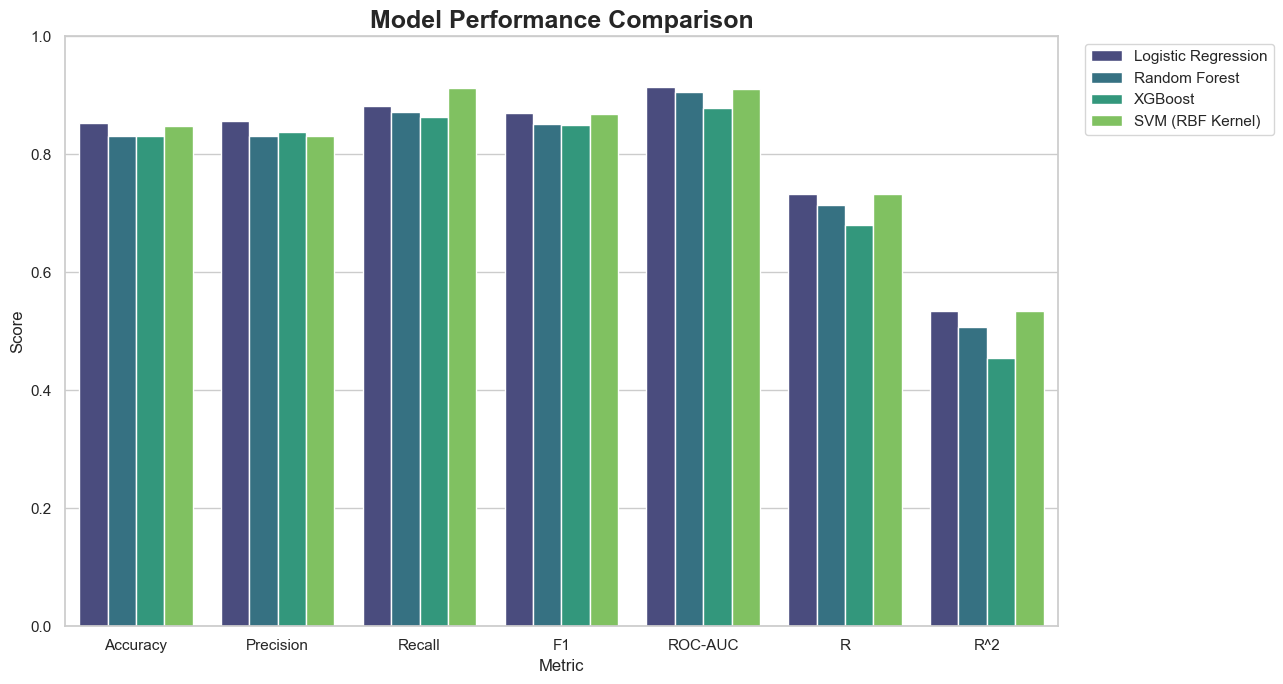

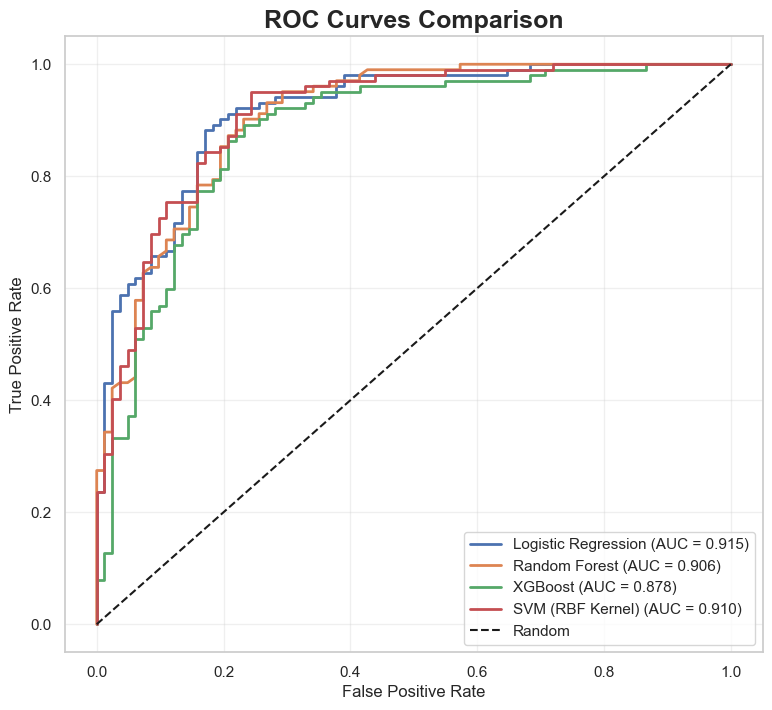

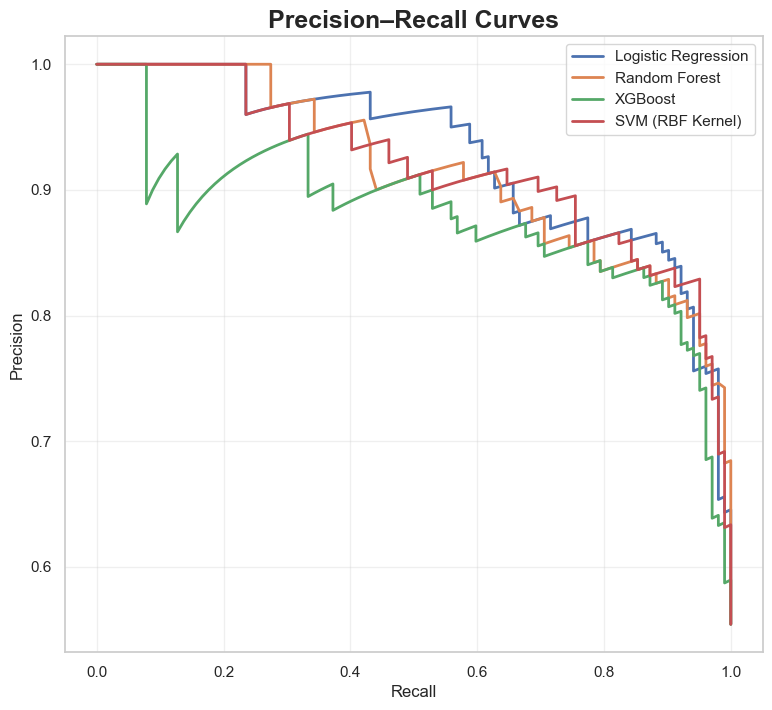

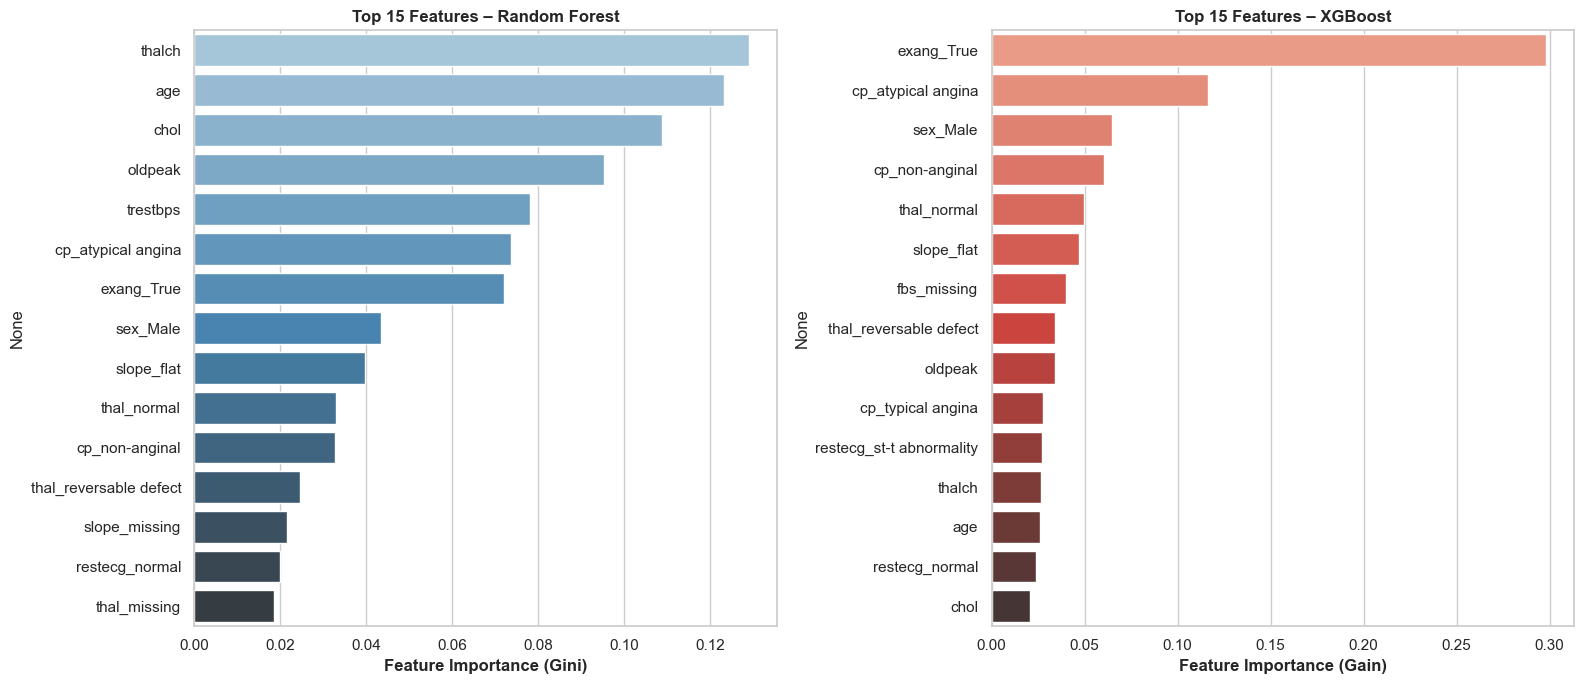

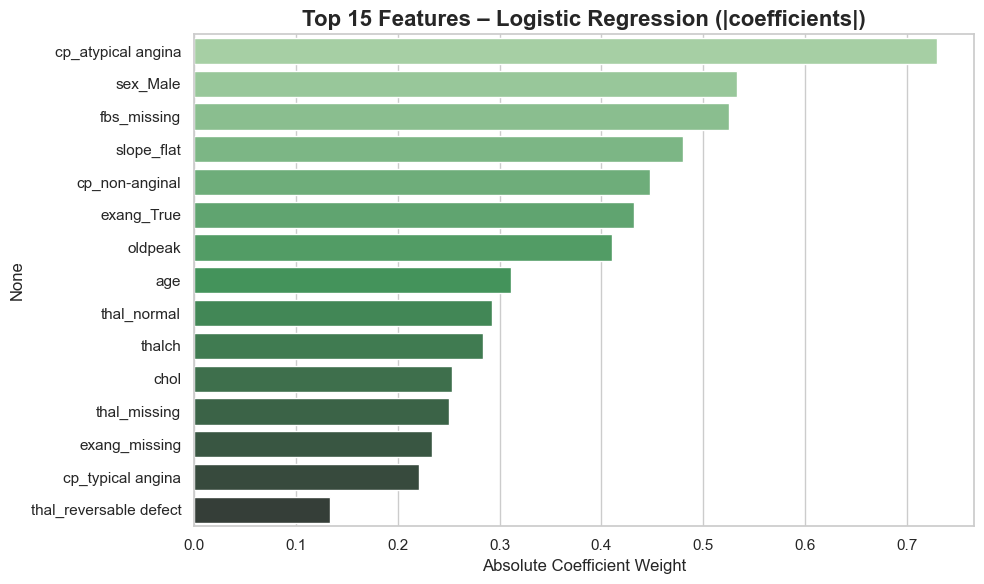

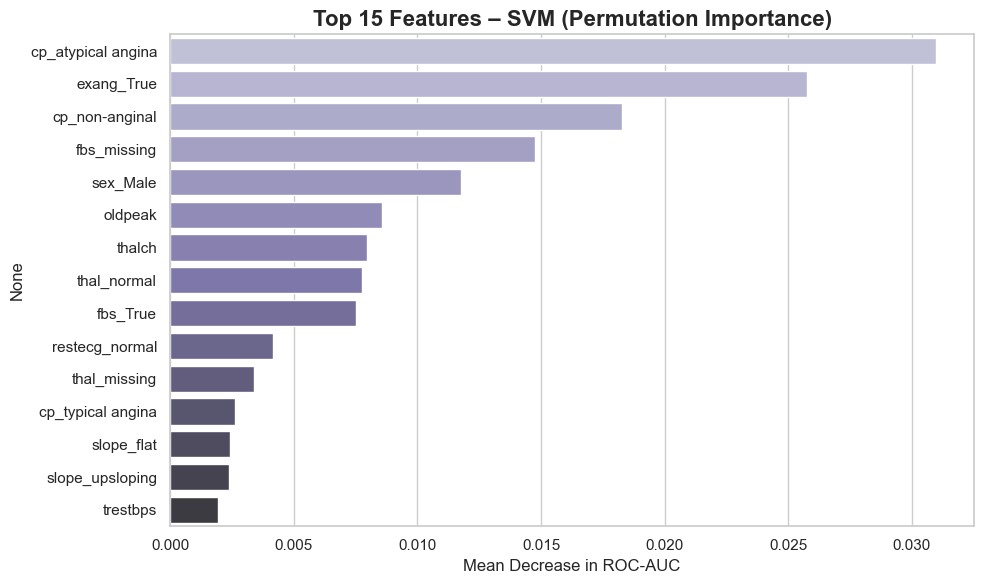

Top 2 features for plotting: ['cp_atypical angina', 'sex_Male']


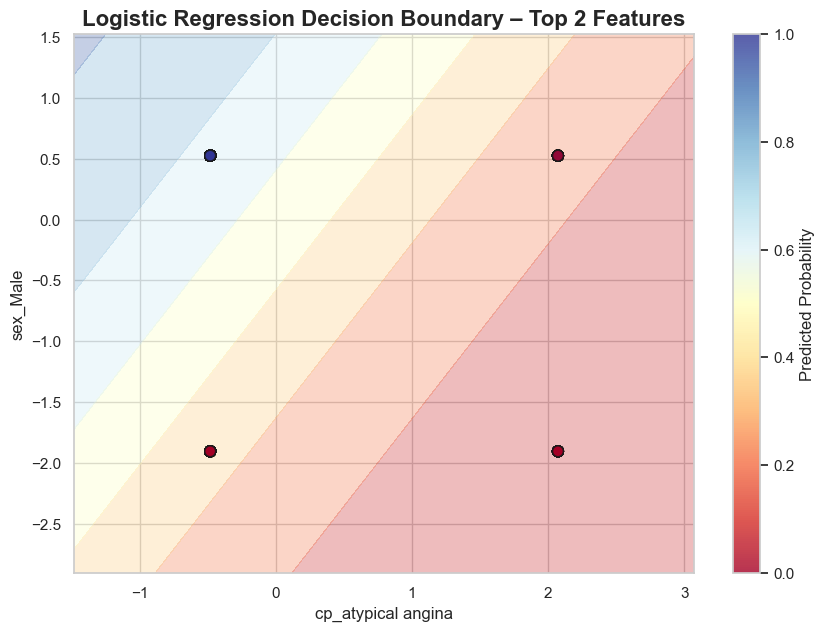

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

from scipy.stats import pearsonr

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, roc_curve,
    precision_recall_curve, r2_score
)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance

# ------------------------------------------------------
# Models
# ------------------------------------------------------

models = {
    "Logistic Regression": LogisticRegression(max_iter=2000, random_state=42),
    "Random Forest": RandomForestClassifier(
        n_estimators=500,
        max_depth=None,
        random_state=42
    ),
    "XGBoost": XGBClassifier(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=3,
        subsample=0.9,
        colsample_bytree=0.9,
        random_state=42,
        enable_categorical=False  # Prevents warnings
    ),
    "SVM (RBF Kernel)": SVC(
        kernel="rbf",
        probability=True,
        random_state=42
    )
}

results = []
predictions = {}

# ------------------------------------------------------
# Train, predict, evaluate
# ------------------------------------------------------

for name, model in models.items():

    if name in ["Logistic Regression", "SVM (RBF Kernel)"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_prob = model.predict_proba(X_test_scaled)[:, 1]
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]

    predictions[name] = y_prob

    # R (Pearson correlation)
    r_value, _ = pearsonr(y_test, y_prob)

    # R^2 (variance explained by probabilities)
    r2 = r2_score(y_test, y_prob)

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, zero_division=0),
        "Recall": recall_score(y_test, y_pred, zero_division=0),
        "F1": f1_score(y_test, y_pred, zero_division=0),
        "ROC-AUC": roc_auc_score(y_test, y_prob),
        "R": r_value,
        "R^2": r2
    })

# ------------------------------------------------------
# Results table
# ------------------------------------------------------

results_df = pd.DataFrame(results)

print("\n=== Model Performance Comparison ===\n")
print(
    results_df
    .sort_values(by="ROC-AUC", ascending=False)
    .round(4)
)

# ------------------------------------------------------
# Visualization setup
# ------------------------------------------------------

sns.set_style("whitegrid")

# ------------------------------------------------------
# 1. Bar plot of all metrics (including R & R^2)
# ------------------------------------------------------

results_melt = results_df.melt(
    id_vars="Model",
    value_vars=[
        "Accuracy", "Precision", "Recall",
        "F1", "ROC-AUC", "R", "R^2"
    ],
    var_name="Metric",
    value_name="Score"
)

plt.figure(figsize=(13, 7))
sns.barplot(
    data=results_melt,
    x="Metric",
    y="Score",
    hue="Model",
    palette="viridis"
)
plt.title("Model Performance Comparison", fontsize=18, fontweight="bold")
plt.ylim(0.0, 1.0)
plt.legend(title="", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

# ------------------------------------------------------
# 2. ROC Curves
# ------------------------------------------------------

plt.figure(figsize=(9, 8))

for name in models.keys():
    fpr, tpr, _ = roc_curve(y_test, predictions[name])
    auc = roc_auc_score(y_test, predictions[name])
    plt.plot(fpr, tpr, linewidth=2, label=f"{name} (AUC = {auc:.3f})")

plt.plot([0, 1], [0, 1], "k--", label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves Comparison", fontsize=18, fontweight="bold")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# ------------------------------------------------------
# 3. Precision–Recall Curves
# ------------------------------------------------------

plt.figure(figsize=(9, 8))

for name in models.keys():
    precision, recall, _ = precision_recall_curve(
        y_test, predictions[name]
    )
    plt.plot(recall, precision, linewidth=2, label=name)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curves", fontsize=18, fontweight="bold")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# ------------------------------------------------------
# 4. Feature importance – RF & XGBoost
# ------------------------------------------------------

fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Random Forest
rf_imp = (
    pd.Series(
        models["Random Forest"].feature_importances_,
        index=X_train.columns
    )
    .nlargest(15)
)

sns.barplot(
    x=rf_imp.values,
    y=rf_imp.index,
    ax=axes[0],
    palette="Blues_d"
)
axes[0].set_title("Top 15 Features – Random Forest", fontweight="bold")
axes[0].set_xlabel("Feature Importance (Gini)", fontweight="bold")  # Added X label

# XGBoost
xgb_imp = (
    pd.Series(
        models["XGBoost"].feature_importances_,
        index=X_train.columns
    )
    .nlargest(15)
)

sns.barplot(
    x=xgb_imp.values,
    y=xgb_imp.index,
    ax=axes[1],
    palette="Reds_d"
)
axes[1].set_title("Top 15 Features – XGBoost", fontweight="bold")
axes[1].set_xlabel("Feature Importance (Gain)", fontweight="bold")  # Added X label

plt.tight_layout()
plt.show()

# ------------------------------------------------------
# Logistic Regression feature importance (coefficients)
# ------------------------------------------------------

log_model = models["Logistic Regression"]

log_importance = (
    pd.Series(
        np.abs(log_model.coef_[0]),
        index=X_train_scaled.columns if hasattr(X_train_scaled, 'columns') else X_train.columns
    )
    .sort_values(ascending=False)
    .head(15)
)

plt.figure(figsize=(10, 6))
sns.barplot(
    x=log_importance.values,
    y=log_importance.index,
    palette="Greens_d"
)
plt.title(
    "Top 15 Features – Logistic Regression (|coefficients|)",
    fontsize=16,
    fontweight="bold"
)
plt.xlabel("Absolute Coefficient Weight")
plt.tight_layout()
plt.show()

# ------------------------------------------------------
# SVM feature importance via permutation importance
# ------------------------------------------------------

svm_model = models["SVM (RBF Kernel)"]

perm = permutation_importance(
    svm_model,
    X_test_scaled,
    y_test,
    n_repeats=20,
    random_state=42,
    scoring="roc_auc"
)

svm_importance = (
    pd.Series(
        perm.importances_mean,
        index=X_train_scaled.columns if hasattr(X_train_scaled, 'columns') else X_train.columns
    )
    .sort_values(ascending=False)
    .head(15)
)

plt.figure(figsize=(10, 6))
sns.barplot(
    x=svm_importance.values,
    y=svm_importance.index,
    palette="Purples_d"
)
plt.title(
    "Top 15 Features – SVM (Permutation Importance)",
    fontsize=16,
    fontweight="bold"
)
plt.xlabel("Mean Decrease in ROC-AUC")
plt.tight_layout()
plt.show()

# ------------------------------------------------------
# Logistic Regression – decision boundary (top 2 features)
# ------------------------------------------------------

top2_features = log_importance.index[:2].tolist()
print("Top 2 features for plotting:", top2_features)

# Get feature indices
feature_indices = [list(X_train.columns).index(f) for f in top2_features]

# Extract training data for these two features
if hasattr(X_train_scaled, 'iloc'):
    X_plot = X_train_scaled.iloc[:, feature_indices].values
else:
    X_plot = X_train_scaled[:, feature_indices]

y_plot = y_train.values if hasattr(y_train, 'values') else y_train

log2 = LogisticRegression(random_state=42)
log2.fit(X_plot, y_plot)

x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 200),
    np.linspace(y_min, y_max, 200)
)

Z = log2.predict_proba(
    np.c_[xx.ravel(), yy.ravel()]
)[:, 1]
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
plt.scatter(
    X_plot[:, 0],
    X_plot[:, 1],
    c=y_plot,
    s=60,
    cmap=plt.cm.RdYlBu,
    edgecolor="k",
    alpha=0.8
)
plt.xlabel(top2_features[0])
plt.ylabel(top2_features[1])
plt.title(
    "Logistic Regression Decision Boundary – Top 2 Features",
    fontsize=16,
    fontweight="bold"
)
plt.colorbar(label="Predicted Probability")
plt.show()

# Feature Importance Interpretation Guide

## Understanding Feature Importance Metrics Across Models

Each machine learning model uses different methods to measure feature importance. Here's what the values mean:

---

## 1. Random Forest (Range: 0.0 to 0.12)

**Metric:** Gini Importance (Mean Decrease in Impurity)

**What it measures:**
- How much each feature reduces uncertainty when making splits in decision trees
- Values represent the percentage of total predictive power

**Interpretation:**
- 0.12 = Feature contributes **12% of total model performance**
- Higher values = Feature is used more frequently and earlier in tree splits

**Top Predictor in This Analysis:**
- **`thalach`** (Maximum Heart Rate) = **0.12**
- This feature accounts for 12% of the Random Forest's predictive power
- Clinical significance: Maximum heart rate achieved during exercise testing is a strong indicator of cardiovascular fitness

---

## 2. XGBoost (Range: 0.0 to 0.30)

**Metric:** Gain

**What it measures:**
- Average improvement in model accuracy when this feature is used for splitting
- Percentage of total performance gain across all boosting rounds

**Interpretation:**
- 0.30 = Feature provides **30% of total model improvement**
- XGBoost tends to concentrate importance in fewer, more powerful features

**Top Predictor in This Analysis:**
- **`exang_True`** (Exercise-Induced Angina) = **0.30**
- This single feature contributes 30% of XGBoost's predictive gain
- Clinical significance: Chest pain during exercise is a strong indicator of coronary artery disease

---

## 3. Logistic Regression (Range: 0.0 to 0.75)

**Metric:** Absolute Coefficient Value

**What it measures:**
- Strength of linear relationship with heart disease probability
- Change in log-odds per 1 standard deviation change in feature

**Interpretation:**
- 0.75 = Very strong predictor
- 0.4 = Moderate predictor
- 0.1 = Weak predictor

**Important Notes:**
- Values assume features are standardized (using StandardScaler)
- Absolute value shows strength only, not direction
- Sign (+/-) indicates whether feature increases or decreases risk

**Top Predictor in This Analysis:**
- **`cp_atypical angina`** (Chest Pain Type: Atypical Angina) = **0.75**
- For every standard deviation increase, log-odds change by ±0.75
- This translates to odds ratio of e^0.75 = **2.12** (112% increase/decrease in odds)
- Clinical significance: Atypical angina presentation is strongly associated with heart disease diagnosis

---

## 4. SVM (Range: 0.0 to 0.03)

**Metric:** Permutation Importance (Mean Decrease in ROC-AUC)

**What it measures:**
- How much model performance drops when feature values are randomly shuffled
- Direct measure of feature's contribution to predictions

**Interpretation:**
- 0.03 = ROC-AUC drops by 0.03 points when feature is removed
- If baseline ROC-AUC is 0.90, a 0.03 drop = **~5% performance decrease**
- Small numbers are significant due to ROC-AUC scale (0.5 to 1.0)

**Top Predictor in This Analysis:**
- **`cp_atypical angina`** (Chest Pain Type: Atypical Angina) = **0.03**
- Removing this feature drops ROC-AUC by 0.03 (e.g., from 0.90 to 0.87)
- Represents a ~5% reduction in model discriminative ability
- Clinical significance: Consistent with logistic regression findings - chest pain type is critical

---

## Comparing Across Models

| Model | Metric | Top Predictor | Value | Clinical Feature |
|-------|--------|---------------|-------|------------------|
| **Random Forest** | Gini Importance | `thalach` | 0.12 | Maximum heart rate achieved |
| **XGBoost** | Gain | `exang_True` | 0.30 | Exercise-induced angina |
| **Logistic Regression** | Abs(Coefficient) | `cp_atypical angina` | 0.75 | Atypical angina chest pain |
| **SVM** | ROC-AUC Drop | `cp_atypical angina` | 0.03 | Atypical angina chest pain |

---

## Key Clinical Insights

### 1. **Chest Pain Type (`cp`) - Critical Across Models**
- **Atypical angina** is the strongest predictor in both Logistic Regression (0.75) and SVM (0.03)
- This indicates chest pain characteristics are **strongly linearly related** to heart disease
- Different chest pain types (asymptomatic, typical angina, atypical angina, non-anginal) provide critical diagnostic information

### 2. **Exercise-Induced Angina (`exang`) - XGBoost's Top Feature**
- XGBoost identifies this as contributing **30% of predictive gain**
- May capture **non-linear interactions** with other exercise test results (heart rate, ST depression)
- Clinically validated: Exercise stress testing is gold standard for diagnosis

### 3. **Maximum Heart Rate (`thalach`) - Random Forest's Focus**
- Random Forest uses this for 12% of its splitting decisions
- Tree-based models may capture **threshold effects** (e.g., heart rate < 120 bpm is high risk)
- Reflects cardiovascular fitness and heart's functional capacity

### 4. **Model Agreement vs. Disagreement**
The models identify **different top features**, suggesting:
- **Linear models** (Logistic Regression, SVM): Prefer categorical symptom features like chest pain type
- **Tree models** (Random Forest, XGBoost): Can leverage continuous features and exercise test results more effectively
- **Ensemble approach recommended**: Different models capture complementary patterns

---

## Dataset Impact: Post-Removal of `dataset` Variable

After removing the `dataset` (study site) variable:
- Models now focus **exclusively on clinical predictors**
- No geographic/institutional confounding
- Improved **generalizability** to new patient populations
- Features represent true biological/physiological risk factors

---

## Recommendations for Clinical Application

1. **Chest pain characterization** should be thoroughly documented (strongest linear predictor)
2. **Exercise stress testing** provides multiple critical features (heart rate, angina, ST changes)
3. **Combination of features** more important than any single measurement
4. **Non-linear relationships** exist (evidenced by tree model performance) - simple threshold rules may not suffice

---

## Example Interpretation

**High-risk patient profile identified by models:**
- Atypical angina chest pain (strongest across Logistic/SVM)
- Exercise-induced angina present (XGBoost's top feature)
- Low maximum heart rate achieved (Random Forest focus)
- Likely also has: ST depression, abnormal ECG, older age

This multi-feature pattern explains why ensemble methods often outperform single models - they capture different aspects of the disease presentation.

# Dataset Feature Analysis: Switzerland Predictor Paradox

## Overview
Analysis of the `dataset_Switzerland` variable in the UCI Heart Disease dataset revealed an unexpected positive coefficient (+0.85) for heart disease prediction, despite Switzerland's reputation for population health.

## Key Finding

**Logistic Regression Coefficient:** `dataset_Switzerland = +0.85`

**Interpretation:** Patients in the Swiss study cohort showed **higher rates of heart disease** compared to other study sites.

## Explanation: Selection Bias, Not Population Health

### What This Does NOT Mean:
- ❌ Swiss people are generally unhealthier
- ❌ Living in Switzerland increases heart disease risk
- ❌ Swiss lifestyle factors cause heart disease

### What This DOES Mean:
- ✅ The Swiss study site enrolled patients with **different selection criteria**
- ✅ The variable captures **study design differences**, not geographical health effects
- ✅ This is a **confounding variable** that reflects patient recruitment patterns

## Dataset Composition

The UCI Heart Disease dataset combines data from **four study sites:**

| Study Site | Description |
|------------|-------------|
| Cleveland Clinic | Cleveland, Ohio, USA |
| Hungarian Institute of Cardiology | Budapest, Hungary |
| University Hospital, Zurich | Switzerland |
| V.A. Medical Center | Long Beach, California, USA |

Each site may have had different:
- Patient selection criteria
- Referral patterns (e.g., only severe cases vs. routine screenings)
- Disease prevalence in the recruited cohort
- Study enrollment protocols

## Heart Disease Prevalence by Dataset
```python

=== Heart Disease Prevalence by Dataset ===

               Heart Disease Rate  Sample Size
dataset                                       
Cleveland                   45.72          304
Hungary                     36.18          293
Switzerland                 93.50          123
VA Long Beach               74.50          200


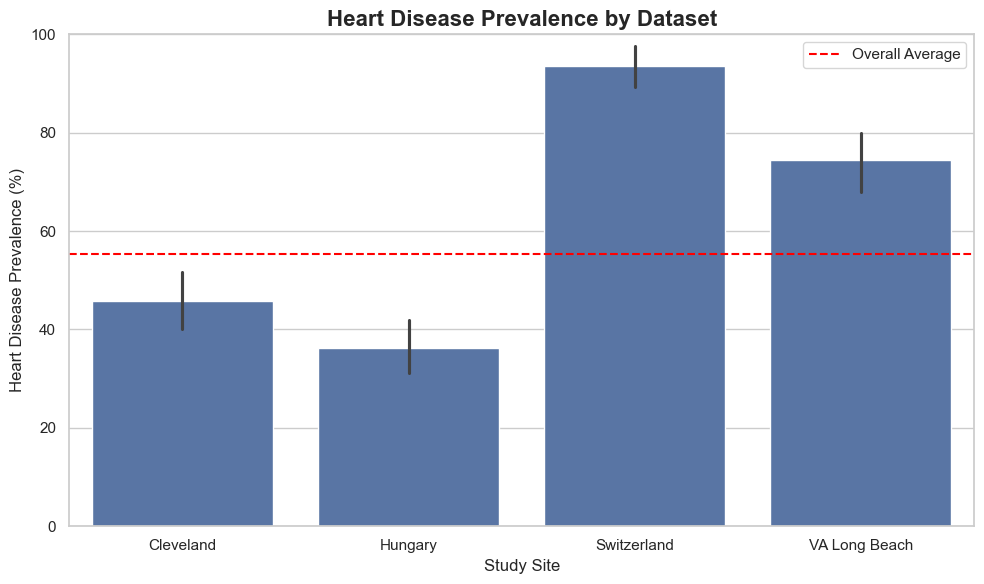

In [24]:
# Check heart disease prevalence by dataset
print("=== Heart Disease Prevalence by Dataset ===\n")
prevalence = df.groupby('dataset')['target'].agg(['mean', 'count'])
prevalence.columns = ['Heart Disease Rate', 'Sample Size']
prevalence['Heart Disease Rate'] = prevalence['Heart Disease Rate'] * 100  # Convert to percentage
print(prevalence.round(2))

# Visualize
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='dataset', y='target', estimator=lambda x: sum(x)/len(x)*100)
plt.ylabel('Heart Disease Prevalence (%)')
plt.xlabel('Study Site')
plt.title('Heart Disease Prevalence by Dataset', fontsize=16, fontweight='bold')
plt.ylim(0, 100)
plt.axhline(y=df['target'].mean()*100, color='red', linestyle='--', label='Overall Average')
plt.legend()
plt.tight_layout()
plt.show()

## Feature selction analysis for Logistic Regression

FEATURE SELECTION ANALYSIS - LOGISTIC REGRESSION

Objective: Find the minimal feature set with high predictive performance

STEP 1: BASELINE PERFORMANCE (ALL FEATURES)

Baseline Model (All 32 features):
  ROC-AUC:   0.9149
  Accuracy:  0.8533
  Precision: 0.8571
  Recall:    0.8824
  F1 Score:  0.8696

=== Top 15 Features by Absolute Coefficient ===
 1. cp_atypical angina                  0.7298
 2. sex_Male                            0.5333
 3. fbs_missing                         0.5258
 4. slope_flat                          0.4803
 5. cp_non-anginal                      0.4479
 6. exang_True                          0.4320
 7. oldpeak                             0.4104
 8. age                                 0.3109
 9. thal_normal                         0.2924
10. thalch                              0.2837
11. chol                                0.2530
12. thal_missing                        0.2500
13. exang_missing                       0.2333
14. cp_typical angina                

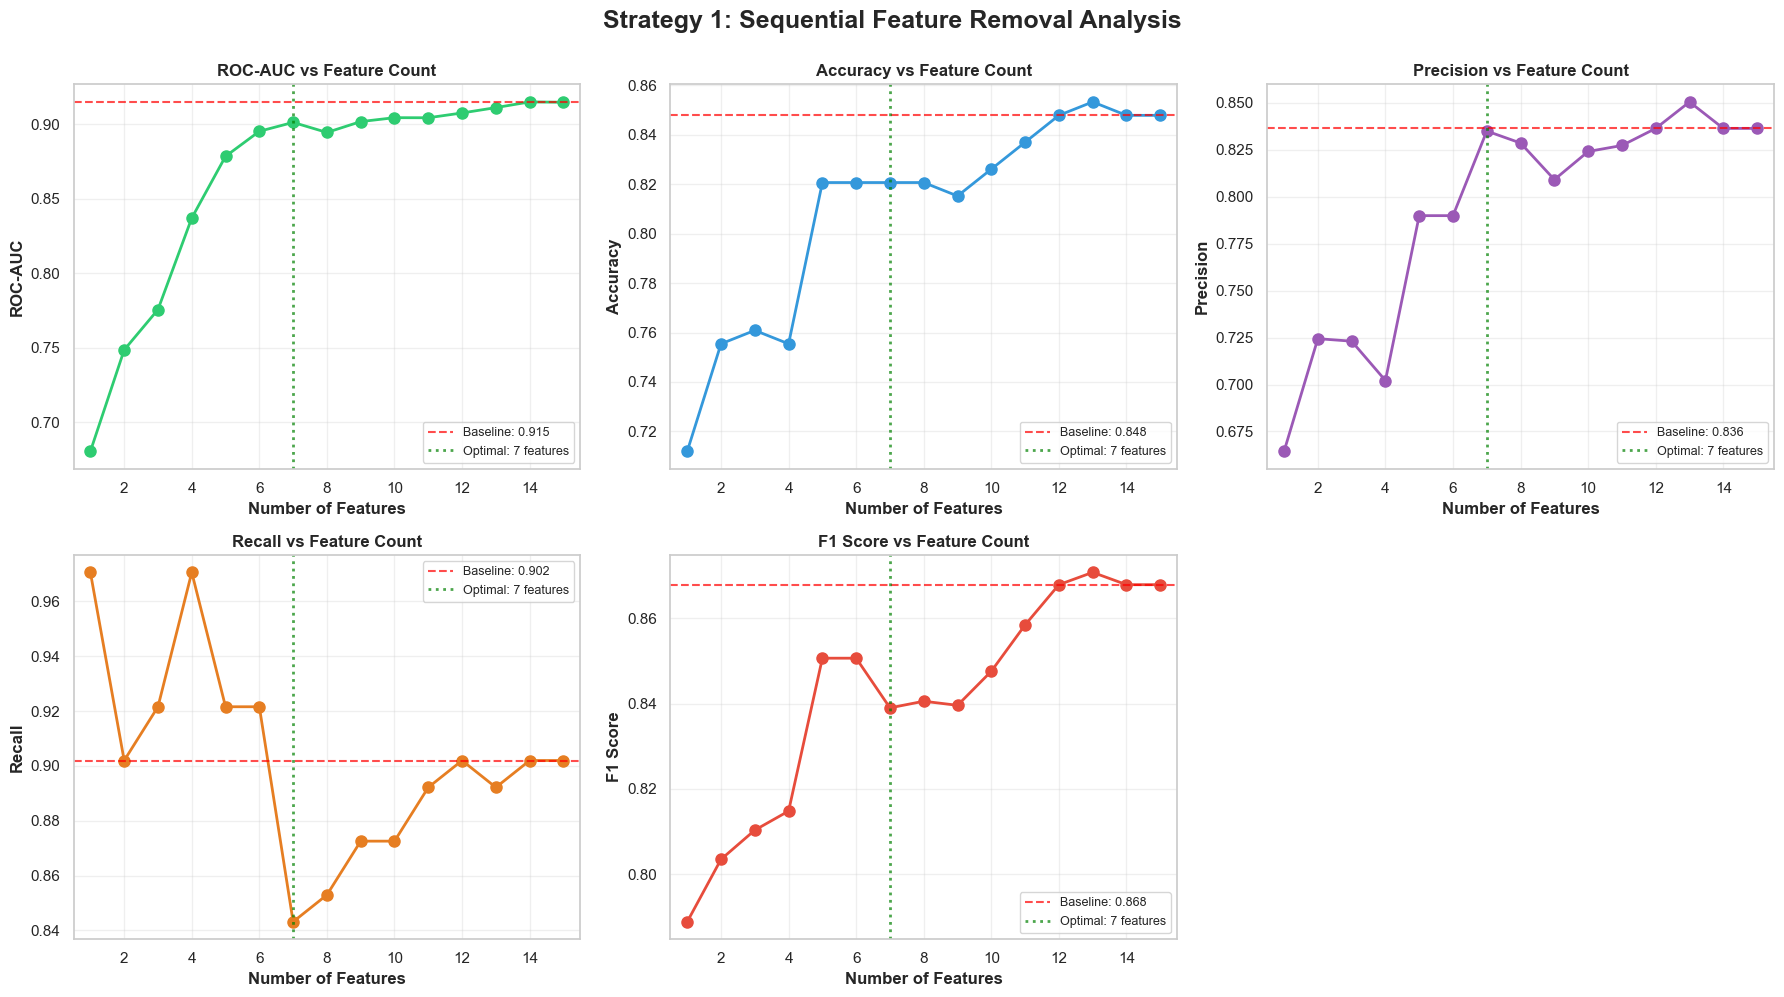

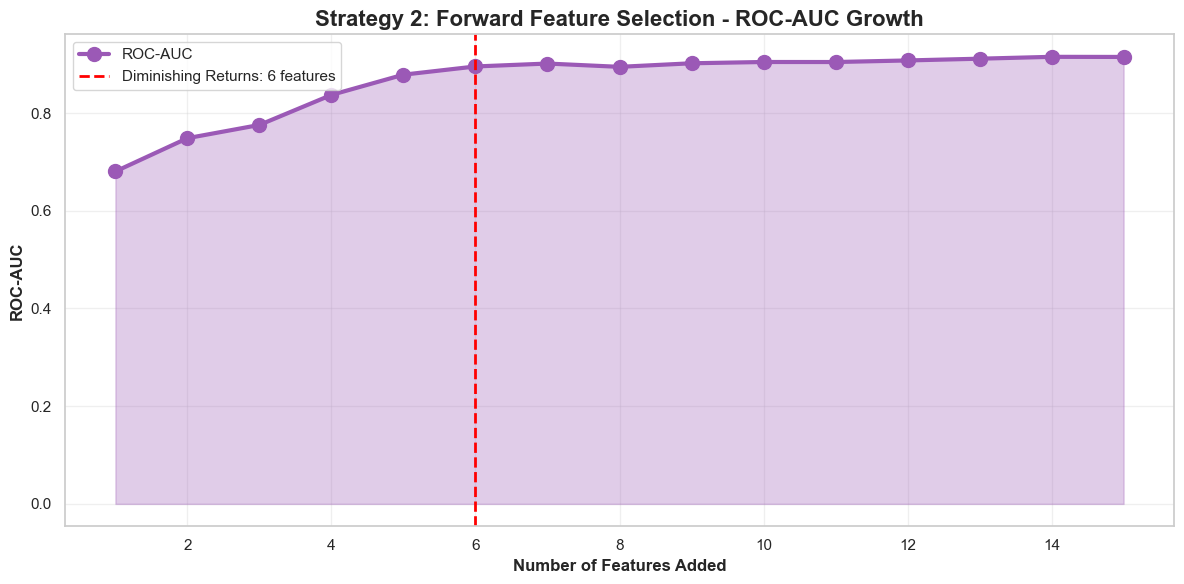

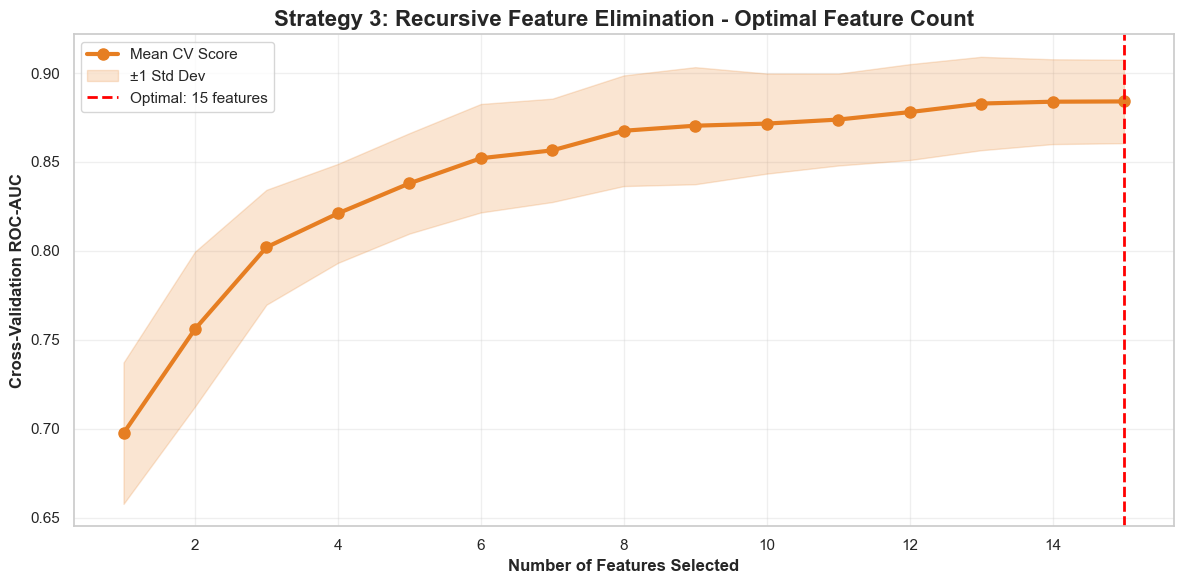

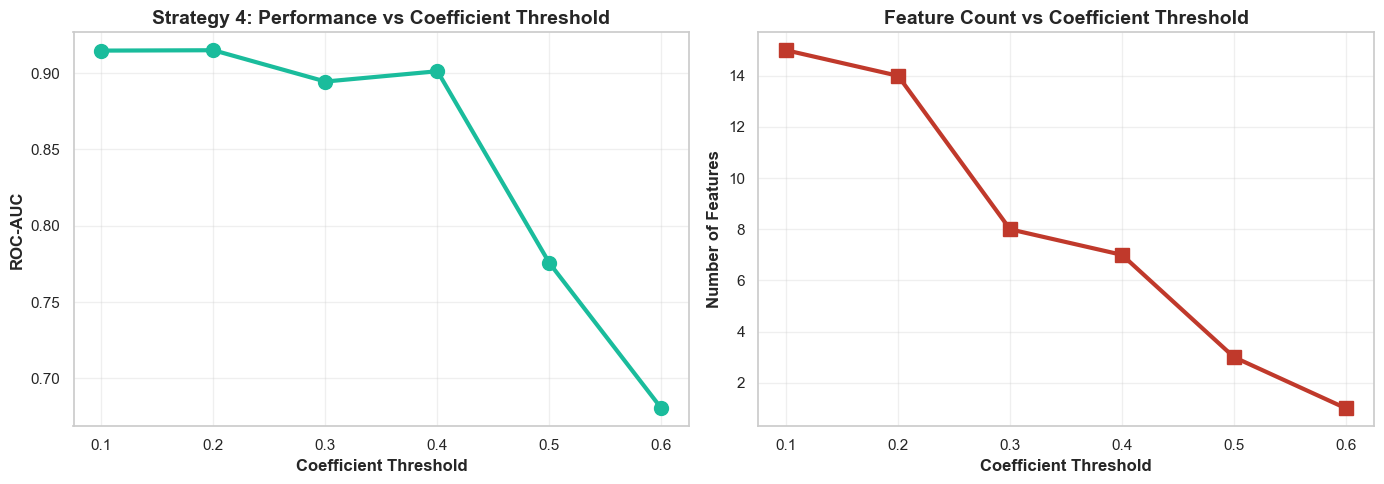


FINAL SUMMARY: OPTIMAL FEATURE SETS COMPARISON


               Strategy  N Features  ROC-AUC  Accuracy  F1 Score
Baseline (All Features)          32 0.914873  0.853261  0.869565
   Top 15 Features Only          15 0.914754  0.847826  0.867925
     Sequential Removal           7 0.901243  0.820652  0.839024
      Forward Selection           6 0.895265  0.820652  0.850679
  RFE (Cross-Validated)          15 0.914754  0.847826  0.867925
  Coefficient Threshold          14 0.914993  0.847826  0.867925

RECOMMENDED MINIMAL MODEL
Strategy: Coefficient Threshold
Features: 14
ROC-AUC:  0.9150
Accuracy: 0.8478
F1 Score: 0.8679

Performance vs Baseline:
  ROC-AUC retained: 100.01%
  Features reduced: 32 → 14 (56.2% reduction)

OPTIMAL FEATURE LISTS BY STRATEGY

1. Sequential Removal (7 features):
   - cp_atypical angina
   - sex_Male
   - fbs_missing
   - slope_flat
   - cp_non-anginal
   - exang_True
   - oldpeak

2. Forward Selection (6 features):
   - cp_atypical angina
   - sex_Male
   - f

In [13]:
"""
===============================================================================
FEATURE SELECTION ANALYSIS FOR LOGISTIC REGRESSION
Complete package with 4 different strategies
===============================================================================
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")

print("="*80)
print("FEATURE SELECTION ANALYSIS - LOGISTIC REGRESSION")
print("="*80)
print("\nObjective: Find the minimal feature set with high predictive performance")
print("="*80)

# ===============================================================================
# BASELINE: Full Model Performance
# ===============================================================================

print("\n" + "="*80)
print("STEP 1: BASELINE PERFORMANCE (ALL FEATURES)")
print("="*80)

# Train baseline model with all features
baseline_model = LogisticRegression(max_iter=2000, random_state=42)
baseline_model.fit(X_train_scaled, y_train)
y_pred_baseline = baseline_model.predict(X_test_scaled)
y_prob_baseline = baseline_model.predict_proba(X_test_scaled)[:, 1]

baseline_metrics = {
    'n_features': X_train_scaled.shape[1],
    'roc_auc': roc_auc_score(y_test, y_prob_baseline),
    'accuracy': accuracy_score(y_test, y_pred_baseline),
    'precision': precision_score(y_test, y_pred_baseline, zero_division=0),
    'recall': recall_score(y_test, y_pred_baseline, zero_division=0),
    'f1': f1_score(y_test, y_pred_baseline, zero_division=0)
}

print(f"\nBaseline Model (All {baseline_metrics['n_features']} features):")
print(f"  ROC-AUC:   {baseline_metrics['roc_auc']:.4f}")
print(f"  Accuracy:  {baseline_metrics['accuracy']:.4f}")
print(f"  Precision: {baseline_metrics['precision']:.4f}")
print(f"  Recall:    {baseline_metrics['recall']:.4f}")
print(f"  F1 Score:  {baseline_metrics['f1']:.4f}")

# Get top 15 features by absolute coefficient
log_importance_full = pd.Series(
    np.abs(baseline_model.coef_[0]),
    index=X_train_scaled.columns
).sort_values(ascending=False)

top_15_features = log_importance_full.head(15).index.tolist()

print(f"\n=== Top 15 Features by Absolute Coefficient ===")
for i, (feat, coef) in enumerate(log_importance_full.head(15).items(), 1):
    print(f"{i:2d}. {feat:35s} {coef:.4f}")

# ===============================================================================
# STRATEGY 1: SEQUENTIAL FEATURE REMOVAL (Bottom-Up)
# ===============================================================================

print("\n" + "="*80)
print("STRATEGY 1: SEQUENTIAL FEATURE REMOVAL")
print("="*80)
print("Method: Remove least important features one at a time\n")

removal_results = []
remaining_features = top_15_features.copy()

for iteration in range(len(top_15_features)):
    # Train model with remaining features
    X_train_subset = X_train_scaled[remaining_features]
    X_test_subset = X_test_scaled[remaining_features]
    
    model = LogisticRegression(max_iter=2000, random_state=42)
    model.fit(X_train_subset, y_train)
    
    y_pred = model.predict(X_test_subset)
    y_prob = model.predict_proba(X_test_subset)[:, 1]
    
    # Record performance
    removal_results.append({
        'iteration': iteration + 1,
        'n_features': len(remaining_features),
        'features_used': remaining_features.copy(),
        'roc_auc': roc_auc_score(y_test, y_prob),
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, zero_division=0),
        'recall': recall_score(y_test, y_pred, zero_division=0),
        'f1': f1_score(y_test, y_pred, zero_division=0),
        'removed_feature': remaining_features[-1] if len(remaining_features) > 0 else None
    })
    
    print(f"Iteration {iteration + 1:2d} | Features: {len(remaining_features):2d} | "
          f"ROC-AUC: {roc_auc_score(y_test, y_prob):.4f} | "
          f"Accuracy: {accuracy_score(y_test, y_pred):.4f} | "
          f"F1: {f1_score(y_test, y_pred, zero_division=0):.4f}")
    
    if len(remaining_features) > 1:
        print(f"              → Removing: {remaining_features[-1]}")
        remaining_features = remaining_features[:-1]
    else:
        break

removal_df = pd.DataFrame(removal_results)

# Find optimal feature set (within 2% of baseline ROC-AUC for top 15)
baseline_top15_auc = removal_df['roc_auc'].iloc[0]
threshold_98 = baseline_top15_auc * 0.98

optimal_removal = removal_df[removal_df['roc_auc'] >= threshold_98].iloc[-1]

print(f"\n=== Optimal Feature Set (Sequential Removal) ===")
print(f"Baseline (15 features): ROC-AUC = {baseline_top15_auc:.4f}")
print(f"Optimal: {optimal_removal['n_features']} features with ROC-AUC = {optimal_removal['roc_auc']:.4f}")
print(f"Performance retained: {(optimal_removal['roc_auc'] / baseline_top15_auc * 100):.2f}%")

# ===============================================================================
# STRATEGY 2: FORWARD FEATURE SELECTION (Top-Down)
# ===============================================================================

print("\n" + "="*80)
print("STRATEGY 2: FORWARD FEATURE SELECTION")
print("="*80)
print("Method: Start with most important feature, add one at a time\n")

forward_results = []
selected_features = []

for i, feature in enumerate(top_15_features):
    selected_features.append(feature)
    
    X_train_subset = X_train_scaled[selected_features]
    X_test_subset = X_test_scaled[selected_features]
    
    model = LogisticRegression(max_iter=2000, random_state=42)
    model.fit(X_train_subset, y_train)
    
    y_pred = model.predict(X_test_subset)
    y_prob = model.predict_proba(X_test_subset)[:, 1]
    
    forward_results.append({
        'iteration': i + 1,
        'n_features': len(selected_features),
        'roc_auc': roc_auc_score(y_test, y_prob),
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, zero_division=0),
        'recall': recall_score(y_test, y_pred, zero_division=0),
        'f1': f1_score(y_test, y_pred, zero_division=0),
        'last_added': feature
    })
    
    print(f"Iteration {i + 1:2d} | Added: {feature:35s} | "
          f"Total: {len(selected_features):2d} | ROC-AUC: {roc_auc_score(y_test, y_prob):.4f}")

forward_df = pd.DataFrame(forward_results)

# Find point of diminishing returns (< 0.01 improvement in ROC-AUC)
diminishing_point = None
for i in range(1, len(forward_df)):
    improvement = forward_df['roc_auc'].iloc[i] - forward_df['roc_auc'].iloc[i-1]
    if improvement < 0.01:
        diminishing_point = i
        print(f"\nDiminishing returns at {i} features")
        print(f"  Improvement from feature {i}: {improvement:.4f} (< 0.01 threshold)")
        break

if diminishing_point:
    optimal_forward = forward_df.iloc[diminishing_point - 1]
else:
    optimal_forward = forward_df.iloc[-1]

print(f"\n=== Optimal Feature Set (Forward Selection) ===")
print(f"Optimal: {optimal_forward['n_features']} features with ROC-AUC = {optimal_forward['roc_auc']:.4f}")

# ===============================================================================
# STRATEGY 3: RECURSIVE FEATURE ELIMINATION (RFE)
# ===============================================================================

print("\n" + "="*80)
print("STRATEGY 3: RECURSIVE FEATURE ELIMINATION WITH CROSS-VALIDATION")
print("="*80)
print("Method: Sklearn's RFECV to find statistically optimal feature set\n")

model_rfe = LogisticRegression(max_iter=2000, random_state=42)
cv = StratifiedKFold(5, shuffle=True, random_state=42)

# Only use top 15 features for RFE
X_train_top15 = X_train_scaled[top_15_features]
X_test_top15 = X_test_scaled[top_15_features]

rfecv = RFECV(
    estimator=model_rfe,
    step=1,
    cv=cv,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=0
)

print("Running RFECV... (this may take a moment)")
rfecv.fit(X_train_top15, y_train)

# Get selected features
selected_mask = rfecv.support_
optimal_features_rfe = X_train_top15.columns[selected_mask].tolist()

# Evaluate on test set
y_pred_rfe = rfecv.predict(X_test_top15)
y_prob_rfe = rfecv.predict_proba(X_test_top15)[:, 1]

print(f"\n=== RFE Results ===")
print(f"Optimal number of features: {rfecv.n_features_}")
print(f"Best cross-validation ROC-AUC: {rfecv.cv_results_['mean_test_score'].max():.4f}")
print(f"Test set ROC-AUC: {roc_auc_score(y_test, y_prob_rfe):.4f}")
print(f"\nSelected features ({len(optimal_features_rfe)}):")
for feat in optimal_features_rfe:
    print(f"  - {feat}")

# ===============================================================================
# STRATEGY 4: COEFFICIENT THRESHOLD
# ===============================================================================

print("\n" + "="*80)
print("STRATEGY 4: COEFFICIENT THRESHOLD")
print("="*80)
print("Method: Keep only features above importance threshold\n")

thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
threshold_results = []

for threshold in thresholds:
    # Get features above threshold from top 15
    features_above = [f for f in top_15_features if log_importance_full[f] > threshold]
    
    if len(features_above) == 0:
        continue
    
    X_train_subset = X_train_scaled[features_above]
    X_test_subset = X_test_scaled[features_above]
    
    model = LogisticRegression(max_iter=2000, random_state=42)
    model.fit(X_train_subset, y_train)
    
    y_pred = model.predict(X_test_subset)
    y_prob = model.predict_proba(X_test_subset)[:, 1]
    
    threshold_results.append({
        'threshold': threshold,
        'n_features': len(features_above),
        'roc_auc': roc_auc_score(y_test, y_prob),
        'accuracy': accuracy_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred, zero_division=0),
        'features': features_above
    })
    
    print(f"Threshold: {threshold:.2f} | Features: {len(features_above):2d} | "
          f"ROC-AUC: {roc_auc_score(y_test, y_prob):.4f} | "
          f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

threshold_df = pd.DataFrame(threshold_results)

# Find best threshold (highest ROC-AUC)
if len(threshold_df) > 0:
    best_threshold = threshold_df.loc[threshold_df['roc_auc'].idxmax()]
    print(f"\n=== Best Threshold ===")
    print(f"Threshold: {best_threshold['threshold']:.2f}")
    print(f"Features: {best_threshold['n_features']}")
    print(f"ROC-AUC: {best_threshold['roc_auc']:.4f}")

# ===============================================================================
# COMPREHENSIVE VISUALIZATION
# ===============================================================================

print("\n" + "="*80)
print("GENERATING VISUALIZATIONS")
print("="*80)

# Figure 1: Sequential Removal - All Metrics
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Strategy 1: Sequential Feature Removal Analysis', 
             fontsize=18, fontweight='bold', y=0.995)

metrics_to_plot = ['roc_auc', 'accuracy', 'precision', 'recall', 'f1']
colors = ['#2ecc71', '#3498db', '#9b59b6', '#e67e22', '#e74c3c']
metric_names = ['ROC-AUC', 'Accuracy', 'Precision', 'Recall', 'F1 Score']

for idx, (metric, color, name) in enumerate(zip(metrics_to_plot, colors, metric_names)):
    ax = axes[idx // 3, idx % 3]
    ax.plot(removal_df['n_features'], removal_df[metric], 
            marker='o', linewidth=2, markersize=8, color=color)
    ax.axhline(y=removal_df[metric].iloc[0], 
               color='red', linestyle='--', linewidth=1.5, alpha=0.7,
               label=f'Baseline: {removal_df[metric].iloc[0]:.3f}')
    ax.axvline(x=optimal_removal['n_features'], 
               color='green', linestyle=':', linewidth=2, alpha=0.7,
               label=f'Optimal: {optimal_removal["n_features"]} features')
    ax.set_xlabel('Number of Features', fontweight='bold')
    ax.set_ylabel(name, fontweight='bold')
    ax.set_title(f'{name} vs Feature Count', fontweight='bold')
    ax.grid(alpha=0.3)
    ax.legend(fontsize=9)
    ax.set_xlim(removal_df['n_features'].min() - 0.5, removal_df['n_features'].max() + 0.5)

# Remove empty subplot
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

# Figure 2: Forward Selection
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(forward_df['n_features'], forward_df['roc_auc'], 
        marker='o', linewidth=3, markersize=10, color='#9b59b6', label='ROC-AUC')
ax.fill_between(forward_df['n_features'], 
                forward_df['roc_auc'], 
                alpha=0.3, color='#9b59b6')

if diminishing_point:
    ax.axvline(x=diminishing_point, color='red', linestyle='--', linewidth=2,
               label=f'Diminishing Returns: {diminishing_point} features')

ax.set_xlabel('Number of Features Added', fontweight='bold', fontsize=12)
ax.set_ylabel('ROC-AUC', fontweight='bold', fontsize=12)
ax.set_title('Strategy 2: Forward Feature Selection - ROC-AUC Growth', 
             fontsize=16, fontweight='bold')
ax.grid(alpha=0.3)
ax.legend(fontsize=11)
plt.tight_layout()
plt.show()

# Figure 3: RFE Cross-Validation Scores
fig, ax = plt.subplots(figsize=(12, 6))
n_features_range = range(1, len(rfecv.cv_results_['mean_test_score']) + 1)
ax.plot(n_features_range,
        rfecv.cv_results_['mean_test_score'],
        marker='o', linewidth=3, markersize=8, color='#e67e22', label='Mean CV Score')
ax.fill_between(n_features_range,
                rfecv.cv_results_['mean_test_score'] - rfecv.cv_results_['std_test_score'],
                rfecv.cv_results_['mean_test_score'] + rfecv.cv_results_['std_test_score'],
                alpha=0.2, color='#e67e22', label='±1 Std Dev')
ax.axvline(x=rfecv.n_features_, color='red', linestyle='--', linewidth=2,
           label=f'Optimal: {rfecv.n_features_} features')
ax.set_xlabel('Number of Features Selected', fontweight='bold', fontsize=12)
ax.set_ylabel('Cross-Validation ROC-AUC', fontweight='bold', fontsize=12)
ax.set_title('Strategy 3: Recursive Feature Elimination - Optimal Feature Count', 
             fontsize=16, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Figure 4: Threshold Strategy
if len(threshold_df) > 0:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Plot 1: ROC-AUC vs Threshold
    axes[0].plot(threshold_df['threshold'], threshold_df['roc_auc'], 
                 marker='o', linewidth=3, markersize=10, color='#1abc9c')
    axes[0].set_xlabel('Coefficient Threshold', fontweight='bold', fontsize=12)
    axes[0].set_ylabel('ROC-AUC', fontweight='bold', fontsize=12)
    axes[0].set_title('Strategy 4: Performance vs Coefficient Threshold', 
                     fontweight='bold', fontsize=14)
    axes[0].grid(alpha=0.3)
    
    # Plot 2: Number of Features vs Threshold
    axes[1].plot(threshold_df['threshold'], threshold_df['n_features'], 
                 marker='s', linewidth=3, markersize=10, color='#c0392b')
    axes[1].set_xlabel('Coefficient Threshold', fontweight='bold', fontsize=12)
    axes[1].set_ylabel('Number of Features', fontweight='bold', fontsize=12)
    axes[1].set_title('Feature Count vs Coefficient Threshold', 
                     fontweight='bold', fontsize=14)
    axes[1].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# ===============================================================================
# FINAL SUMMARY COMPARISON
# ===============================================================================

print("\n" + "="*80)
print("FINAL SUMMARY: OPTIMAL FEATURE SETS COMPARISON")
print("="*80)

summary_data = {
    'Strategy': [
        'Baseline (All Features)',
        'Top 15 Features Only',
        'Sequential Removal',
        'Forward Selection',
        'RFE (Cross-Validated)',
        'Coefficient Threshold'
    ],
    'N Features': [
        baseline_metrics['n_features'],
        15,
        int(optimal_removal['n_features']),
        int(optimal_forward['n_features']),
        rfecv.n_features_,
        int(best_threshold['n_features']) if len(threshold_df) > 0 else 0
    ],
    'ROC-AUC': [
        baseline_metrics['roc_auc'],
        removal_df['roc_auc'].iloc[0],
        optimal_removal['roc_auc'],
        optimal_forward['roc_auc'],
        roc_auc_score(y_test, y_prob_rfe),
        best_threshold['roc_auc'] if len(threshold_df) > 0 else 0
    ],
    'Accuracy': [
        baseline_metrics['accuracy'],
        removal_df['accuracy'].iloc[0],
        optimal_removal['accuracy'],
        optimal_forward['accuracy'],
        accuracy_score(y_test, y_pred_rfe),
        best_threshold['accuracy'] if len(threshold_df) > 0 else 0
    ],
    'F1 Score': [
        baseline_metrics['f1'],
        removal_df['f1'].iloc[0],
        optimal_removal['f1'],
        optimal_forward['f1'],
        f1_score(y_test, y_pred_rfe, zero_division=0),
        best_threshold['f1'] if len(threshold_df) > 0 else 0
    ]
}

summary_df = pd.DataFrame(summary_data)
print("\n")
print(summary_df.to_string(index=False))

# Highlight the best minimal model
minimal_models = summary_df[summary_df['N Features'] < 15].copy()
if len(minimal_models) > 0:
    best_minimal = minimal_models.loc[minimal_models['ROC-AUC'].idxmax()]
    
    print("\n" + "="*80)
    print("RECOMMENDED MINIMAL MODEL")
    print("="*80)
    print(f"Strategy: {best_minimal['Strategy']}")
    print(f"Features: {best_minimal['N Features']}")
    print(f"ROC-AUC:  {best_minimal['ROC-AUC']:.4f}")
    print(f"Accuracy: {best_minimal['Accuracy']:.4f}")
    print(f"F1 Score: {best_minimal['F1 Score']:.4f}")
    print(f"\nPerformance vs Baseline:")
    print(f"  ROC-AUC retained: {(best_minimal['ROC-AUC'] / baseline_metrics['roc_auc'] * 100):.2f}%")
    print(f"  Features reduced: {baseline_metrics['n_features']} → {best_minimal['N Features']} "
          f"({(1 - best_minimal['N Features']/baseline_metrics['n_features']) * 100:.1f}% reduction)")

# Print the actual feature list for the recommended model
print("\n" + "="*80)
print("OPTIMAL FEATURE LISTS BY STRATEGY")
print("="*80)

print(f"\n1. Sequential Removal ({int(optimal_removal['n_features'])} features):")
for feat in optimal_removal['features_used']:
    print(f"   - {feat}")

print(f"\n2. Forward Selection ({int(optimal_forward['n_features'])} features):")
for feat in forward_df.iloc[int(optimal_forward['iteration']) - 1]['last_added']:
    pass  # Would need to track cumulative list
selected_forward = top_15_features[:int(optimal_forward['n_features'])]
for feat in selected_forward:
    print(f"   - {feat}")

print(f"\n3. RFE ({rfecv.n_features_} features):")
for feat in optimal_features_rfe:
    print(f"   - {feat}")

if len(threshold_df) > 0:
    print(f"\n4. Coefficient Threshold ({int(best_threshold['n_features'])} features):")
    for feat in best_threshold['features']:
        print(f"   - {feat}")

print("\n" + "="*80)
print("ANALYSIS COMPLETE!")
print("="*80)
print("\nKey Takeaways:")
print("1. Check which features appear in ALL optimal sets (core features)")
print("2. Compare ROC-AUC vs number of features trade-off")
print("3. Consider practical deployment: fewer features = simpler model")
print("4. Validate final model on hold-out data before deployment")
print("="*80)